In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('/Users/yimeng_yin/Desktop/STAT222/data/data_items.csv')
df

,cik,sic,sic_description,filedate,accession_num,primary_doc,filelink,bank_status,Assets,AssetsCurrent,...,ebit_over_assets,current_assets_over_assets,cash_over_assets,cash_operation_over_assets,cash_operation_over_liabilities,main_industry,year,item_1A,item_2,item_7
0,1606180,8093,"Services-Specialty Outpatient Facilities, NEC",4/15/2019,0001564590-19-011552,aac-10k_20181231.htm,https://www.sec.gov/Archives/edgar/data/160618...,1,4.522770e+08,63964000,...,-0.082998,0.141427,0.011959,-0.063797,-0.070375,Services,2019,Item 1A. Risk Factors\nOur actual operating re...,Item 2. Properties\nA listing of our owned and...,Item 7. Management’s Discussion and Analysis o...
1,2034,5122,"Wholesale-Drugs, Proprietaries & Druggists' Su...",9/28/2018,0001144204-18-051414,tv501271_10k.htm,https://www.sec.gov/Archives/edgar/data/2034/0...,1,7.670240e+08,502627000,...,-0.358544,0.655295,0.131513,0.132729,0.151556,Wholesale Trade,2018,Item 1A. Risk Factors\nYou should carefully co...,"Item 2. Properties\nIn March 2010, we purchase...",Item 7. Management’s Discussion and Analysis o...
2,3116,2834,Pharmaceutical Preparations,2/26/2020,0001628280-20-002314,akorn10k12312019.htm,https://www.sec.gov/Archives/edgar/data/3116/0...,1,1.288639e+09,480047000,...,-0.034129,0.372522,0.112370,-0.028650,-0.035016,Manufacturing,2020,Item 1A. Risk Factors.\nAn investment in our c...,Item 2. Properties.\nOur manufacturing facilit...,Item 7. Management’s Discussion and Analysis o...
3,1376610,1040,Gold and Silver Ores,3/27/2015,0001376610-15-000004,anv-2014123110xk.htm,https://www.sec.gov/Archives/edgar/data/137661...,1,9.412380e+08,298847000,...,-0.510096,0.317504,0.008048,0.000884,0.001254,Mining,2015,Item 1A. Risk Factors\nAny investment in Allie...,Item 2. Properties\nWe classify our mineral pr...,Item 7. Management’s Discussion and Analysis o...
4,1405073,1311,Crude Petroleum & Natural Gas,3/18/2019,0001564590-19-008275,arex-10k_20181231.htm,https://www.sec.gov/Archives/edgar/data/140507...,1,1.084647e+09,16225000,...,0.001115,0.014959,0.000020,0.032033,0.070133,Mining,2019,ITEM 1A.\nRISK FACTORS\nYou should carefully c...,ITEM 2.\nPROPERTIES\nPermian Basin - Project P...,ITEM 7.\nMANAGEMENT’S DISCUSSION AND ANALYSIS ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,1403568,5990,"Retail-Retail Stores, NEC",3/27/2020,0001558370-20-003272,ulta-20200201x10k11b4b7.htm,https://www.sec.gov/Archives/edgar/data/140356...,0,4.863872e+09,2055317000,...,0.059162,0.422568,0.080661,0.226423,0.371835,Retail Trade,2020,Item 1A. Risk Factors\nThe risks described bel...,"Item 2. Properties\nAll of our retail stores, ...",Item 7. Management’s Discussion and Analysis o...
9707,1403568,5990,"Retail-Retail Stores, NEC",4/2/2019,0001558370-19-002739,ulta-20190202x10k.htm,https://www.sec.gov/Archives/edgar/data/140356...,0,3.191172e+09,1914861000,...,0.088121,0.600049,0.128245,0.299616,0.697417,Retail Trade,2019,Item 1A. Risk Factors\nThe risks described bel...,"Item 2. Properties\nAll of our retail stores, ...",Item 7. Management’s Discussion and Analysis o...
9708,1403568,5990,"Retail-Retail Stores, NEC",4/3/2018,0001558370-18-002733,ulta-20180203x10k.htm,https://www.sec.gov/Archives/edgar/data/140356...,0,2.908687e+09,1693743000,...,0.087469,0.582305,0.095385,0.267944,0.686987,Retail Trade,2018,Item 1A. Risk Factors\nThe risks described bel...,"Item 2. Properties\nAll of our retail stores, ...",Item 7. Management’s Discussion and Analysis o...
9709,1403568,5990,"Retail-Retail Stores, NEC",4/3/2013,0001193125-13-140116,d466694d10k.htm,https://www.sec.gov/Archives/edgar/data/140356...,0,1.275249e+09,789324000,...,0.081369,0.618957,0.251304,0.187415,0.489448,Retail Trade,2013,Item 1A. Risk Factors\nInvestment in our commo...,"Item 2. Properties\nAll of our retail stores, ...",Item 7. Management’s Discussion and Analysis o...


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711 entries, 0 to 9710
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cik                                         9711 non-null   int64  
 1   sic                                         9711 non-null   int64  
 2   sic_description                             9711 non-null   object 
 3   filedate                                    9711 non-null   object 
 4   accession_num                               9711 non-null   object 
 5   primary_doc                                 9711 non-null   object 
 6   filelink                                    9711 non-null   object 
 7   bank_status                                 9711 non-null   int64  
 8   Assets                                      9711 non-null   float64
 9   AssetsCurrent                               9711 non-null   int64  
 10  Liabilities 

In [5]:
df.describe()

,cik,sic,bank_status,Assets,AssetsCurrent,Liabilities,LiabilitiesCurrent,StockholdersEquity,CashAndCashEquivalentsAtCarryingValue,NetCashProvidedByUsedInOperatingActivities,...,debt_to_equity,debt_to_total_assets,return_on_assets,return_on_equity,ebit_over_assets,current_assets_over_assets,cash_over_assets,cash_operation_over_assets,cash_operation_over_liabilities,year
count,9.711000e+03,9711.000000,9711.000000,9.711000e+03,9.711000e+03,9.711000e+03,9.711000e+03,9.711000e+03,9.711000e+03,9.711000e+03,...,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000
mean,1.175589e+06,4384.416023,0.007002,1.297254e+09,4.967145e+08,7.655239e+08,2.731980e+08,5.317305e+08,1.492044e+08,1.195521e+08,...,3.957969,6.192498,-5.030444,-3.195919,-2.014378,0.582736,0.266807,-0.949245,-0.605835,2019.259397
std,4.689155e+05,2053.809246,0.083391,5.373571e+09,2.101171e+09,3.461773e+09,1.373729e+09,2.435456e+09,5.797716e+08,9.392615e+08,...,333.234894,186.683916,206.677044,354.735109,41.929190,0.282642,0.265872,23.860592,2.788108,3.366026
min,2.034000e+03,100.000000,0.000000,2.470000e+02,3.000000e+00,8.000000e+02,8.000000e+02,-4.900000e+09,3.000000e+00,-5.052000e+09,...,-2367.031583,0.001068,-18891.369980,-34756.774020,-3049.436709,0.000006,0.000005,-2014.677215,-106.934005,2010.000000
25%,9.126150e+05,2834.000000,0.000000,2.460990e+07,1.353362e+07,8.660763e+06,5.494991e+06,8.143500e+06,3.825844e+06,-1.285136e+07,...,0.151018,0.248408,-0.381167,-0.365311,-0.401941,0.351820,0.061020,-0.314948,-0.702845,2017.000000
50%,1.275187e+06,3690.000000,0.000000,1.618950e+08,9.456100e+07,4.936200e+07,2.458600e+07,7.829800e+07,2.455400e+07,-1.398620e+05,...,0.521734,0.464346,-0.050418,-0.007380,-0.056717,0.602359,0.169982,-0.012278,-0.021164,2020.000000
75%,1.530586e+06,5961.000000,0.000000,7.540495e+08,3.469315e+08,3.388720e+08,1.259305e+08,3.605985e+08,1.072915e+08,4.443600e+07,...,1.290801,0.715906,0.022970,0.106464,0.039689,0.834767,0.392733,0.090408,0.187303,2022.000000
max,1.993004e+06,8900.000000,1.000000,2.070000e+11,7.328600e+10,8.345100e+10,4.365800e+10,1.235490e+11,1.813300e+10,5.366600e+10,...,32298.587340,15413.638540,1033.487395,2511.566667,37.951173,1.000000,1.000000,21.334744,80.772517,2024.000000


## Histograms and boxplots

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


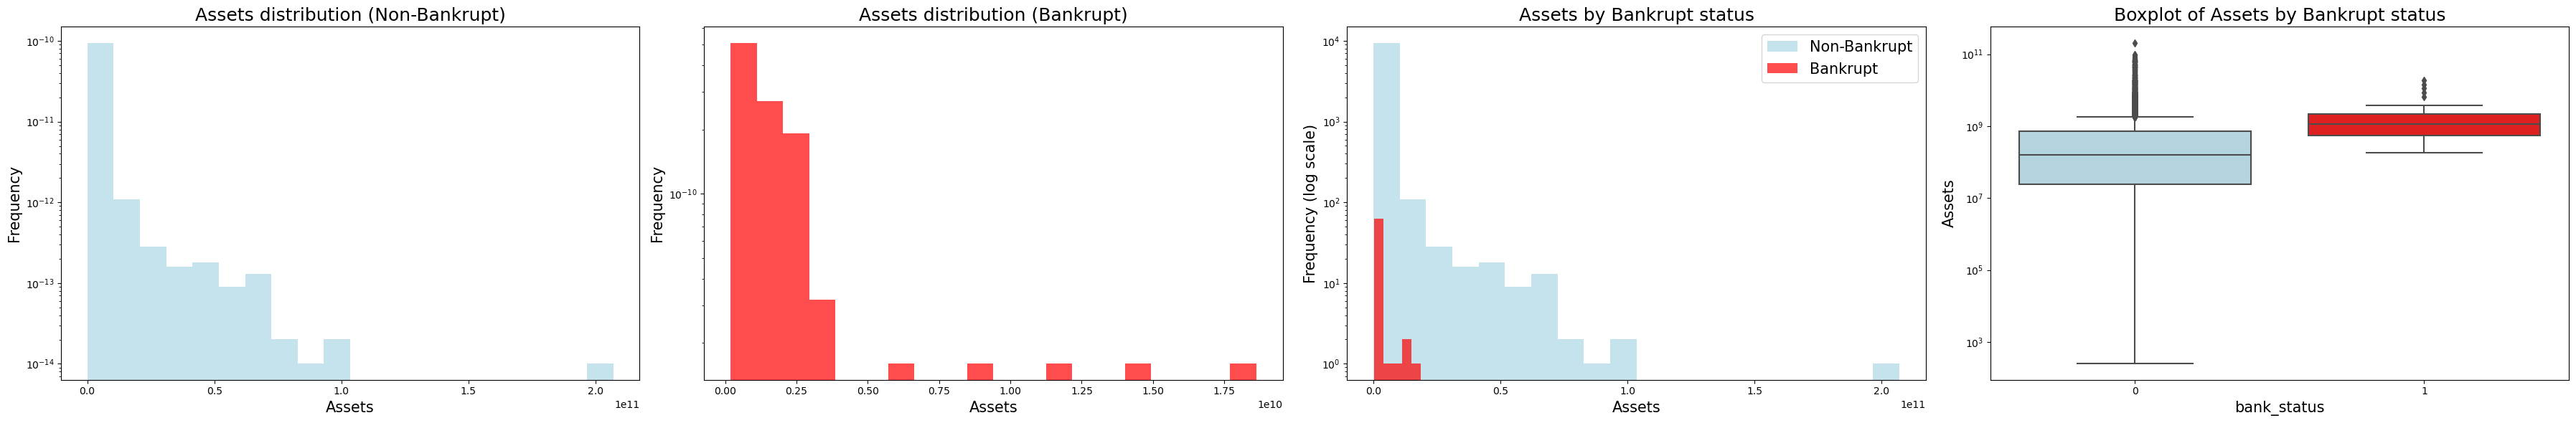

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


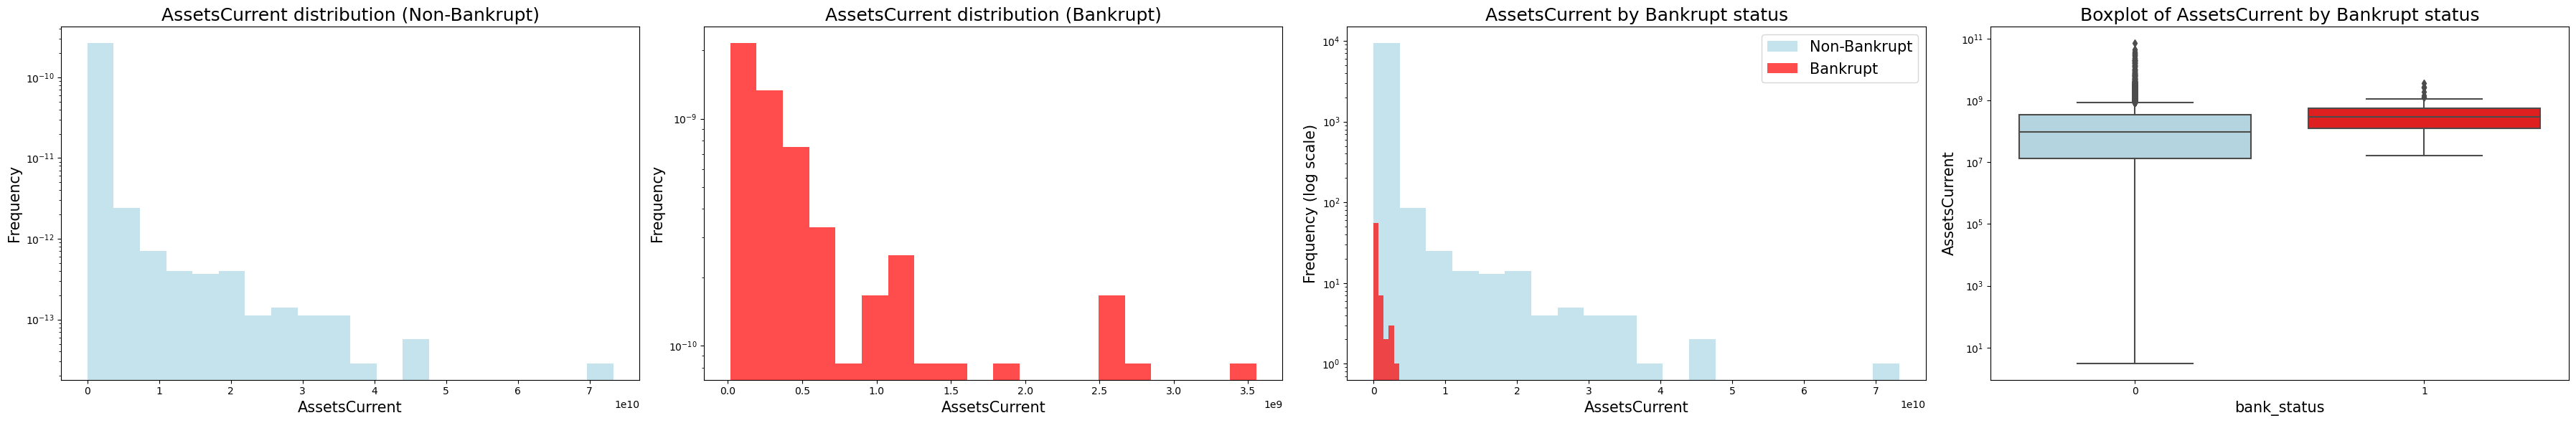

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


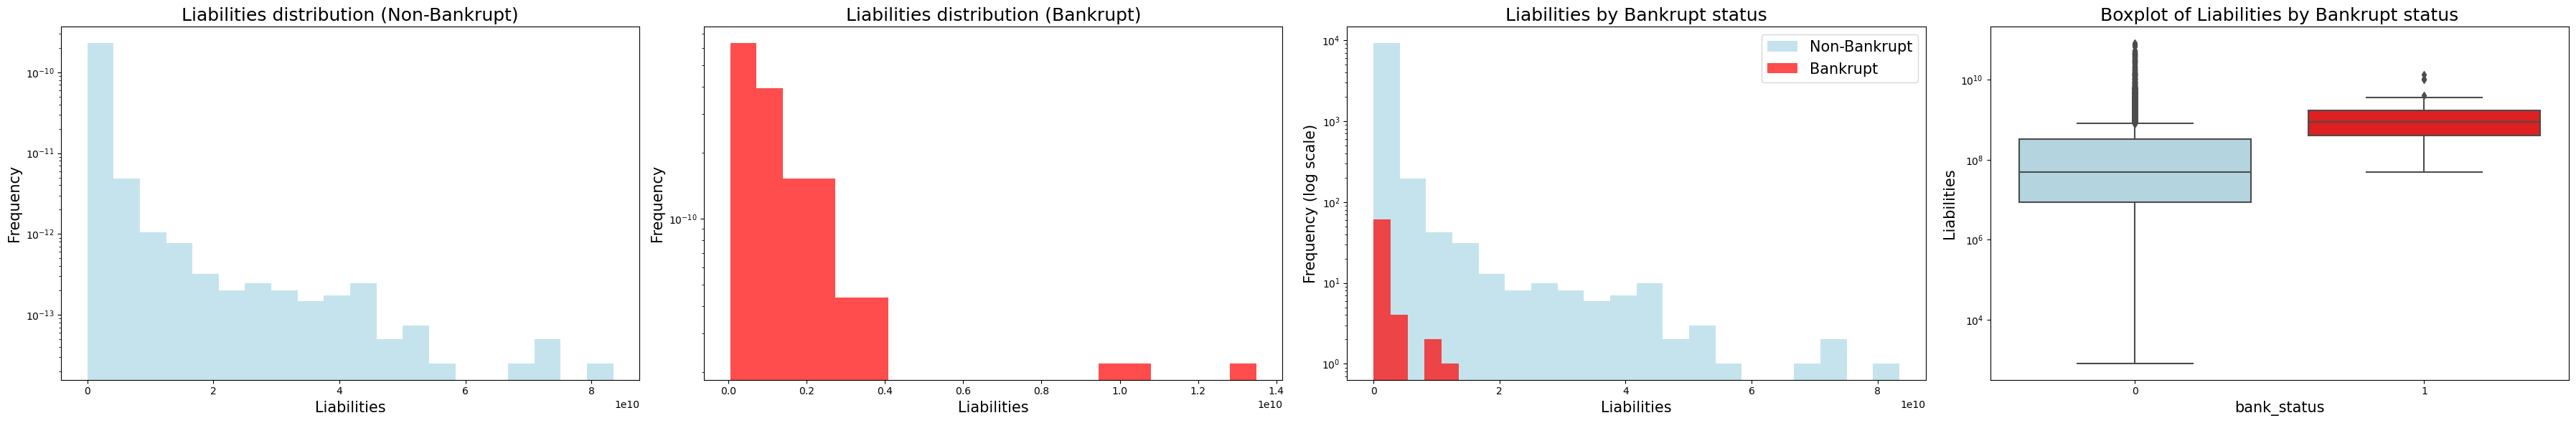

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


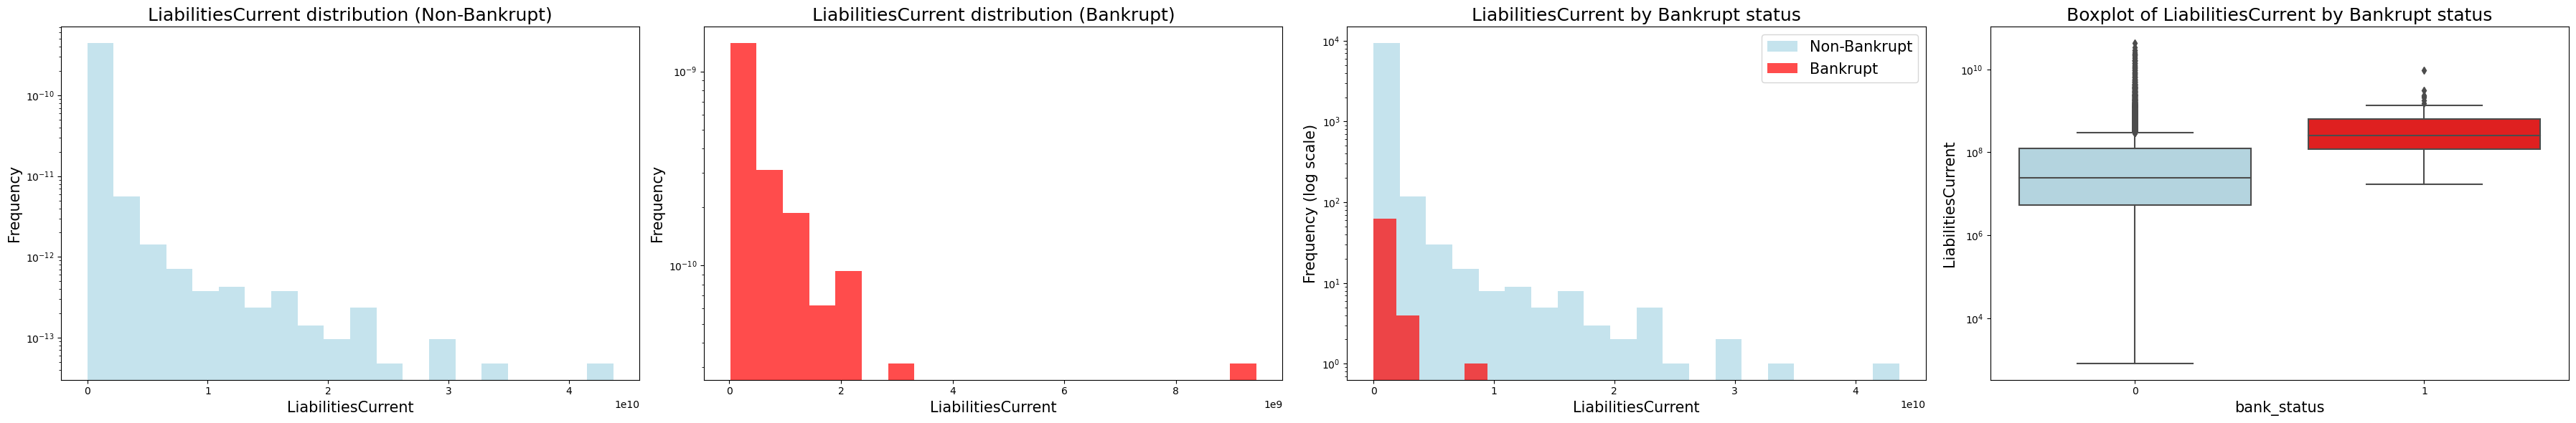

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


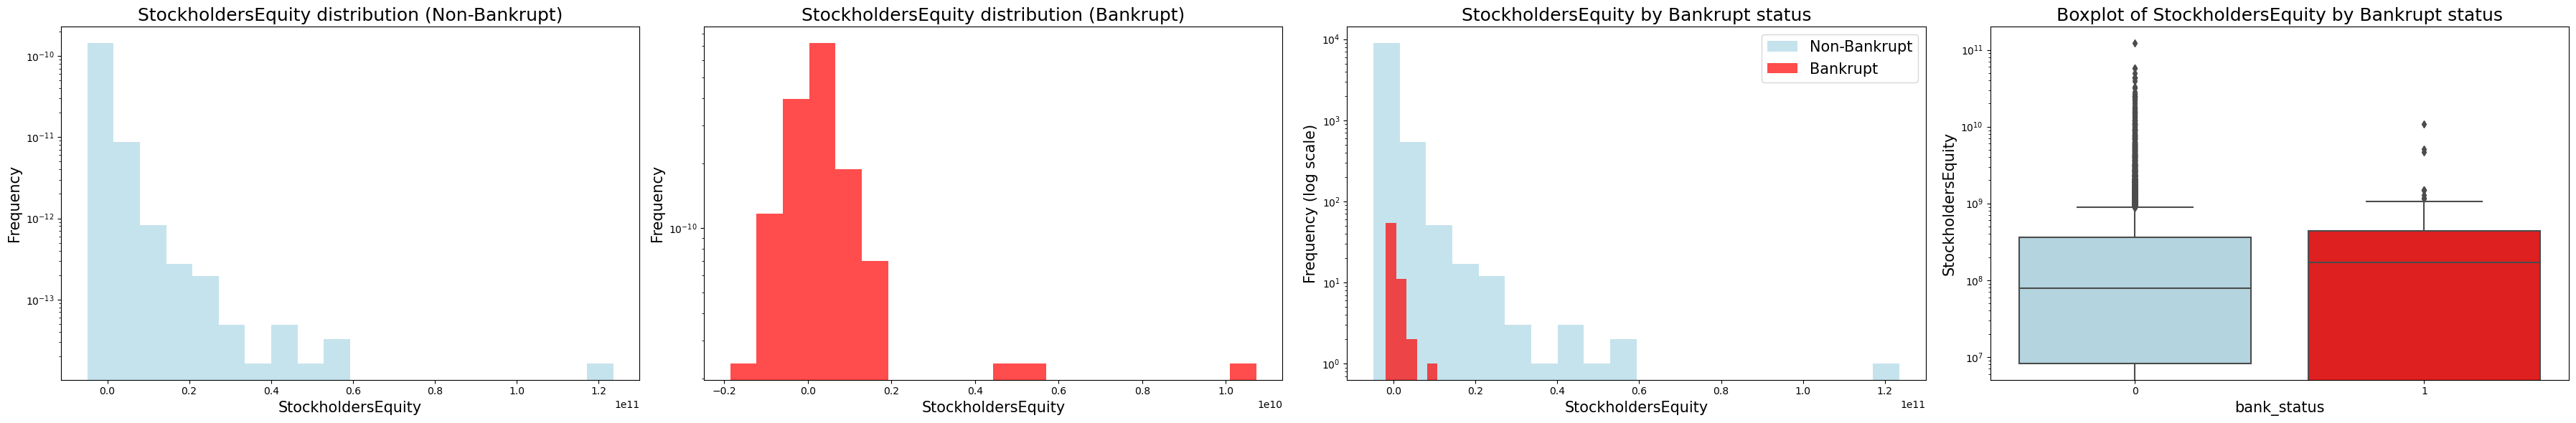

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


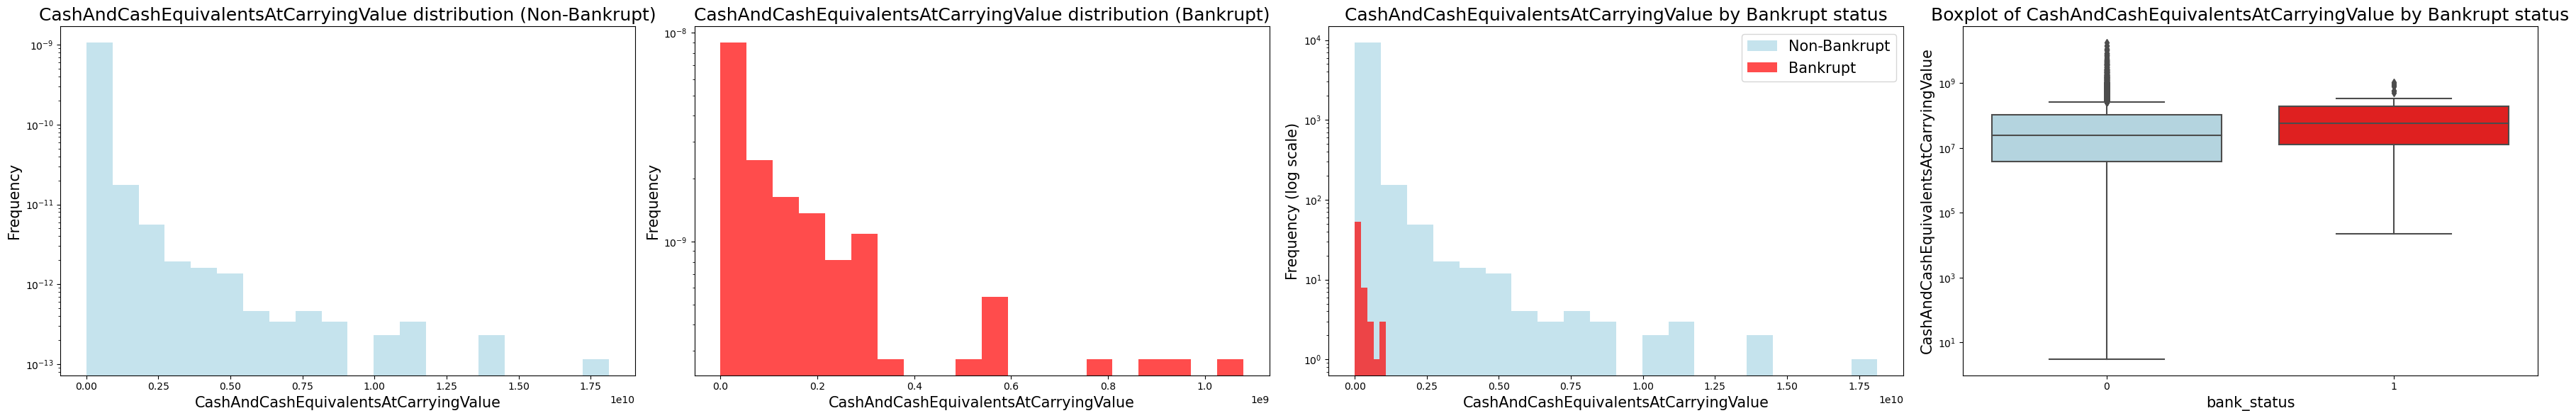

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


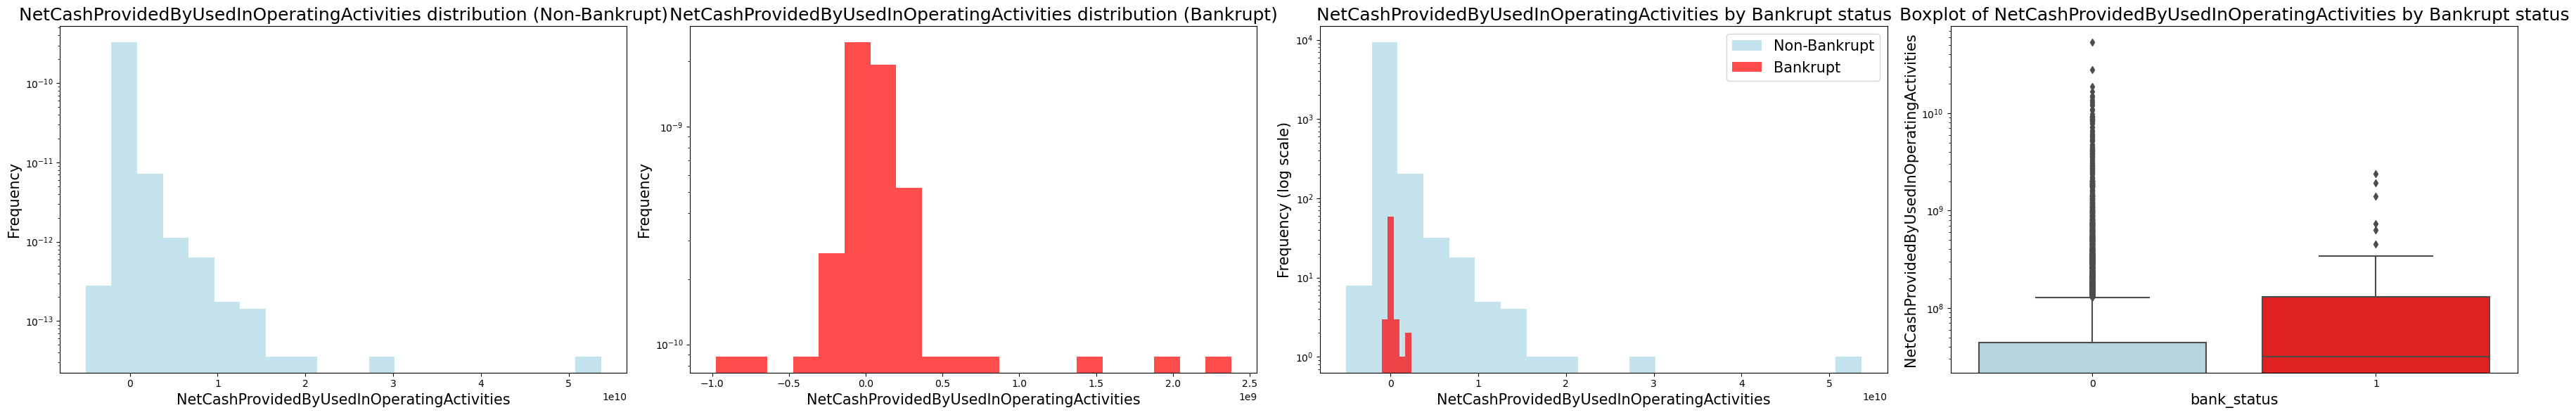

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


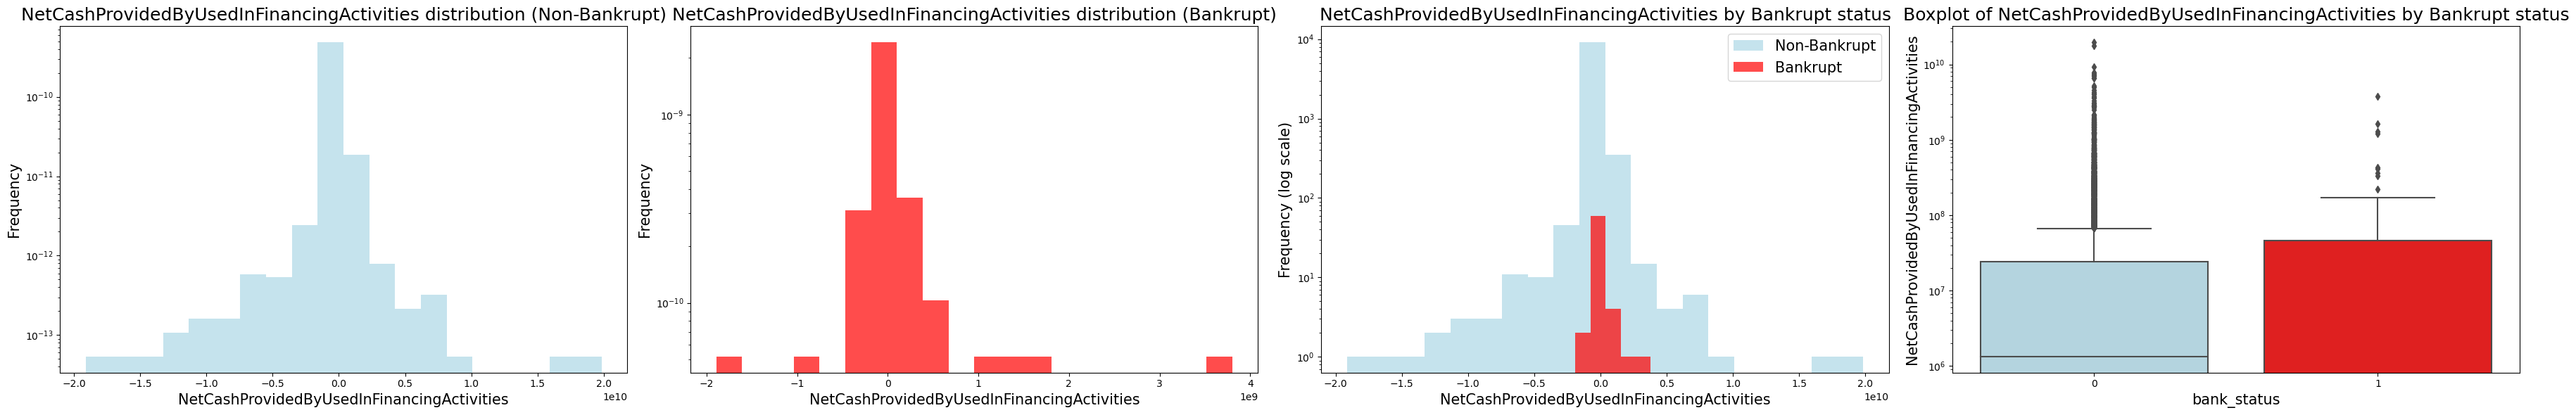

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


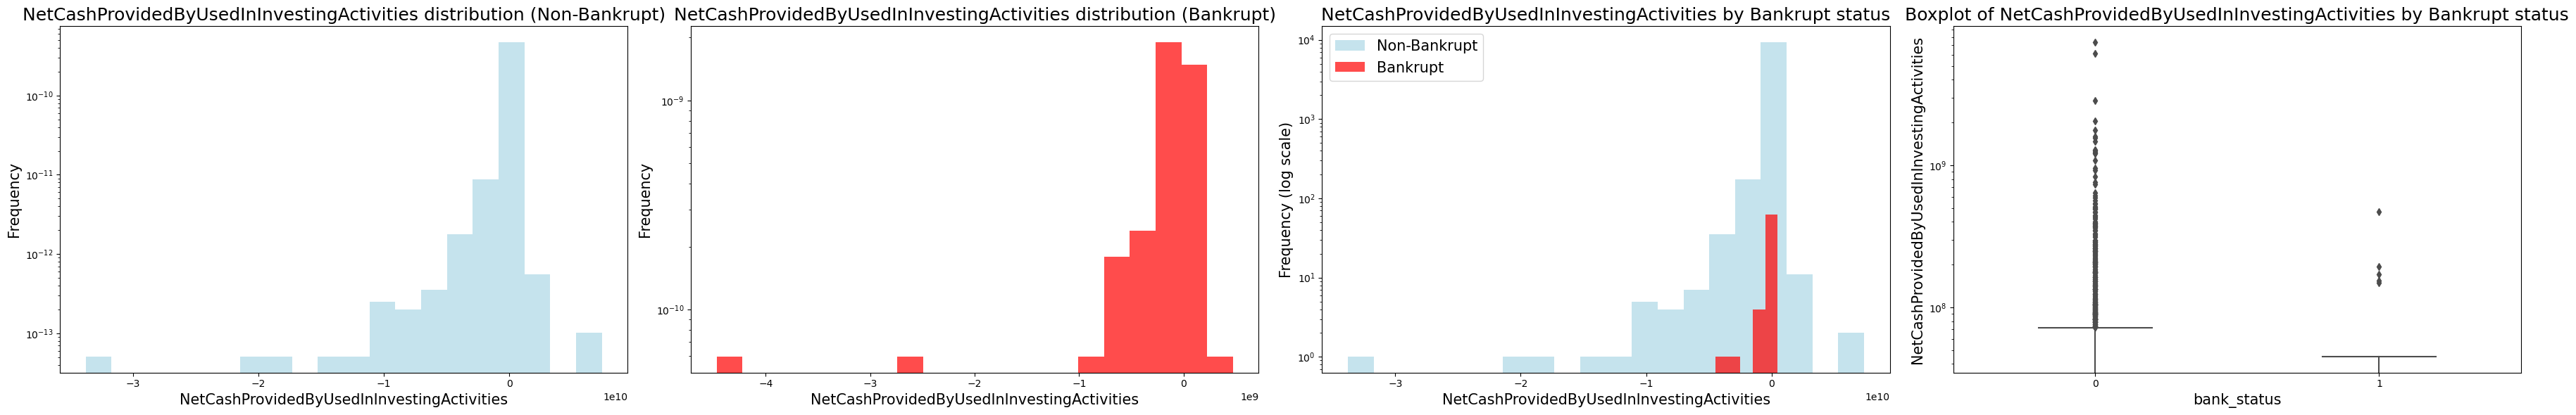

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


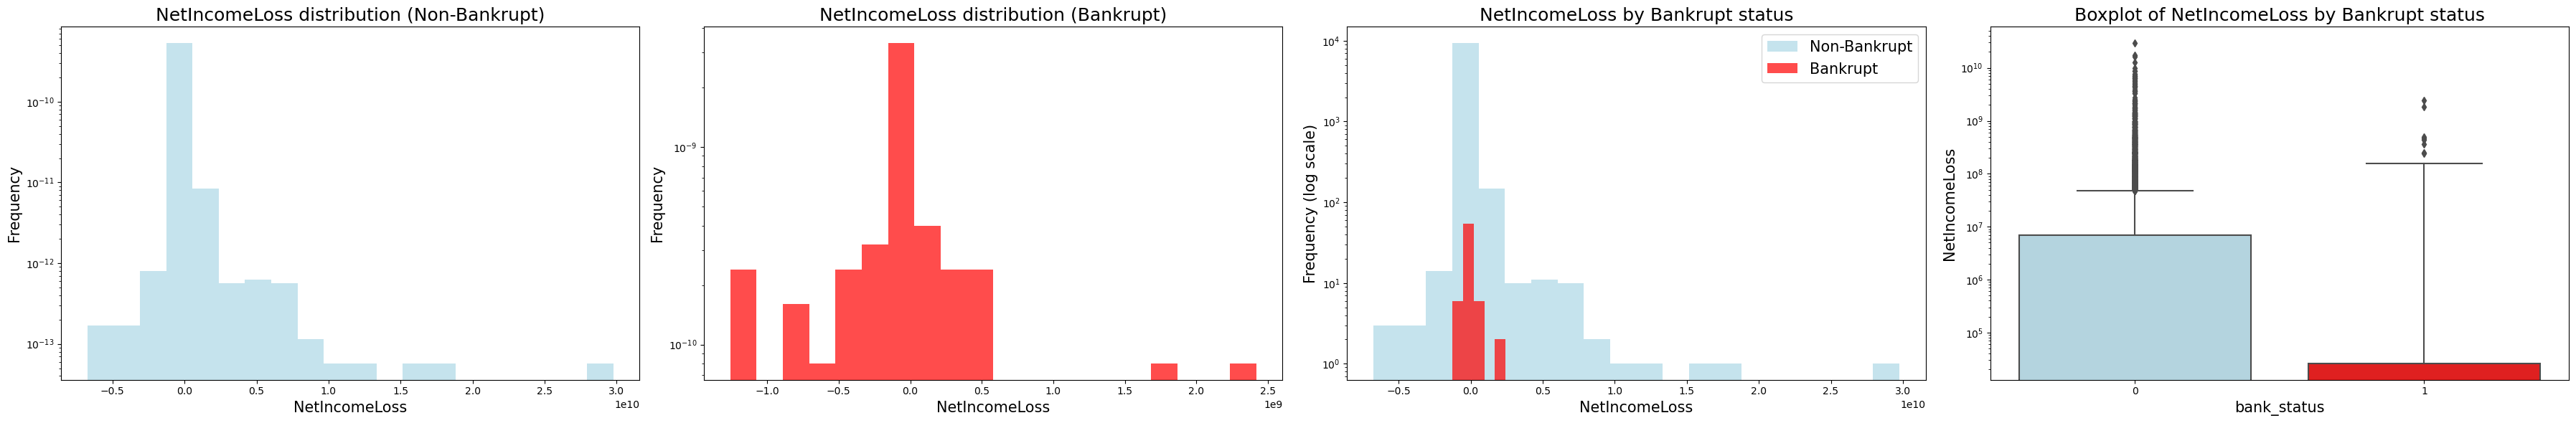

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


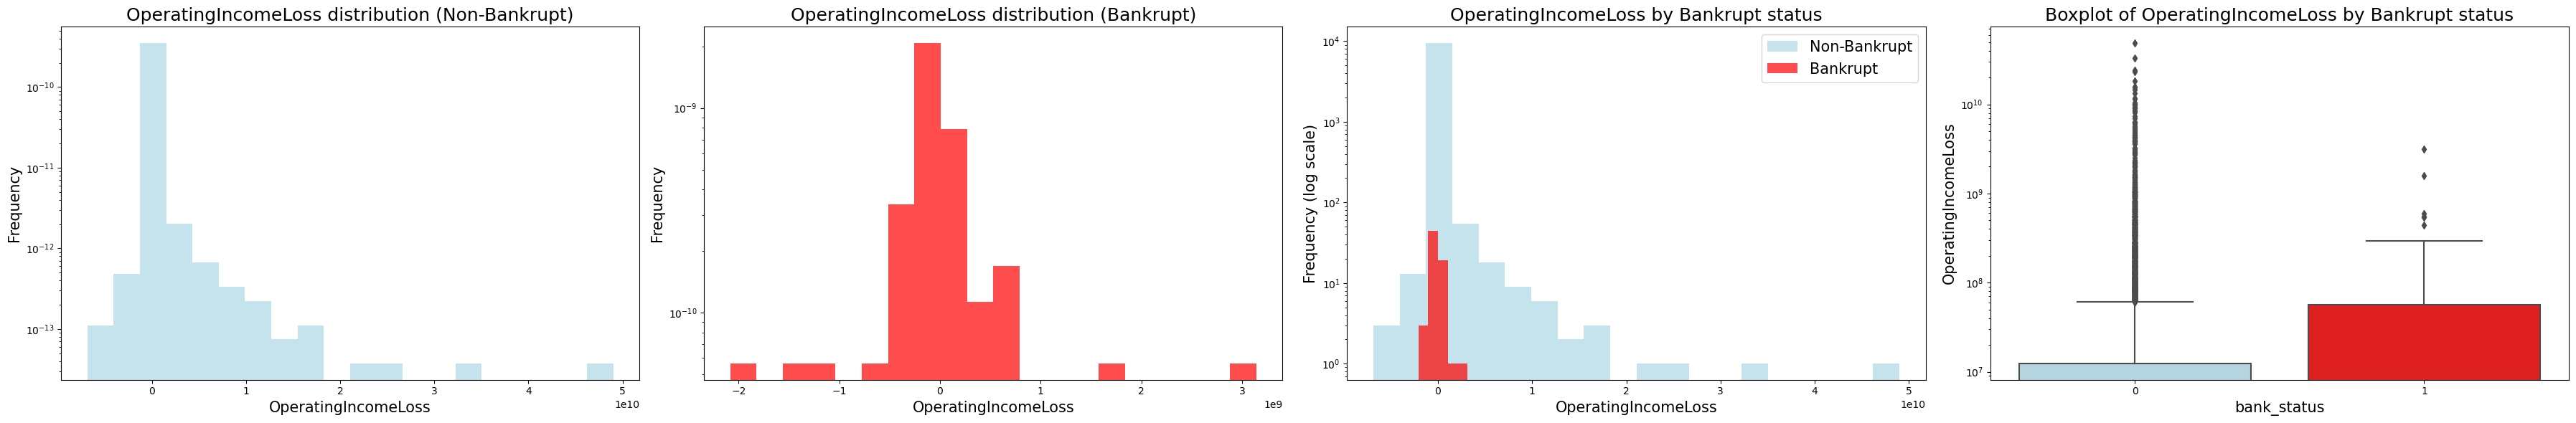

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


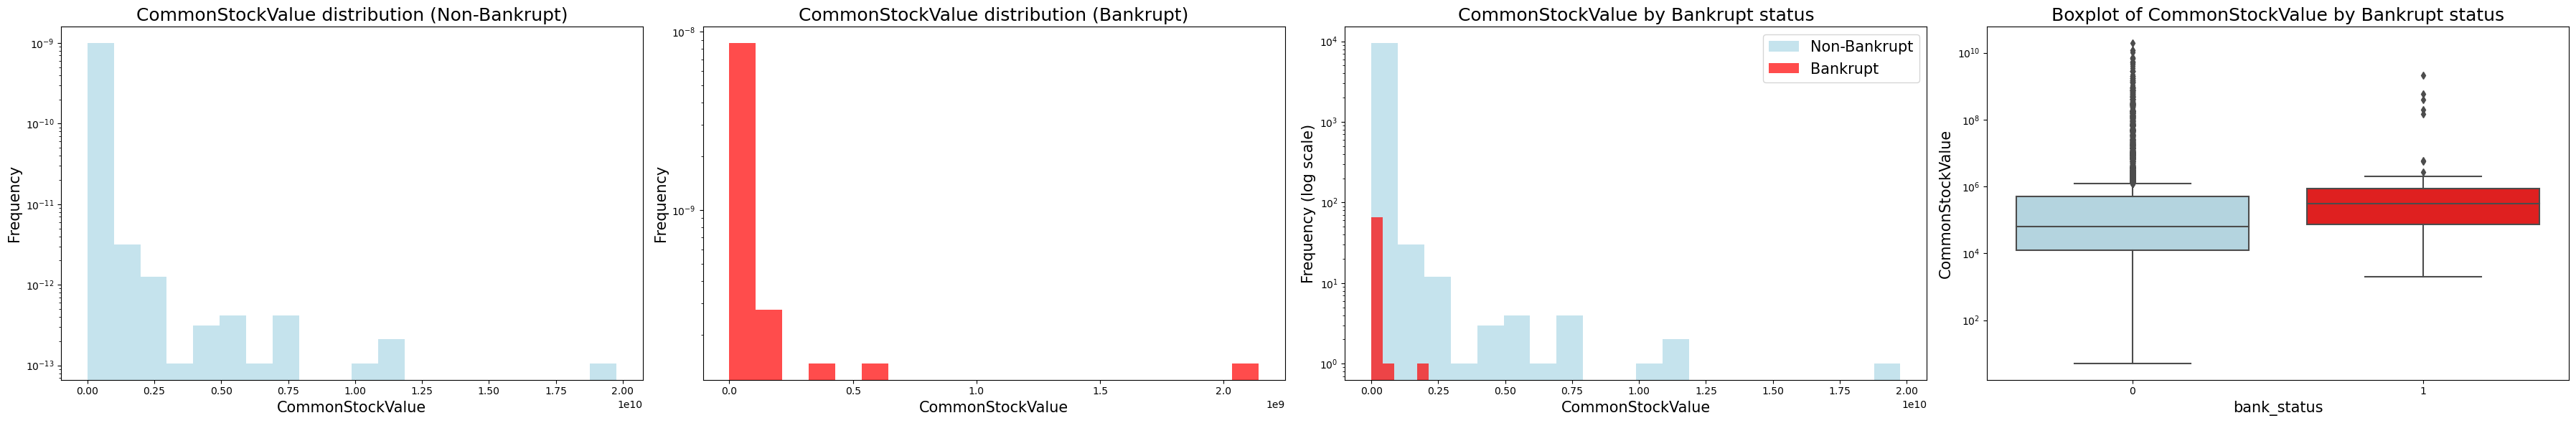

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


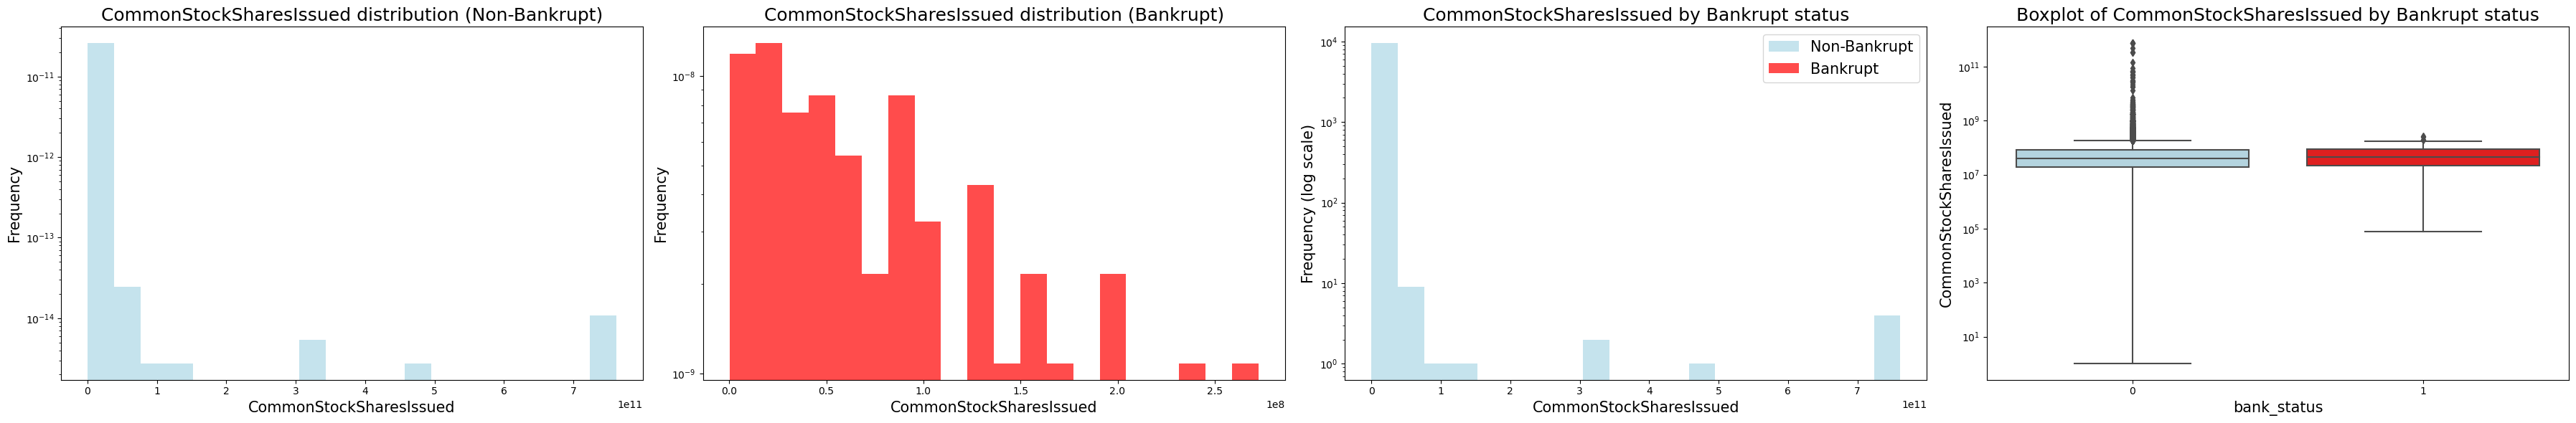

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


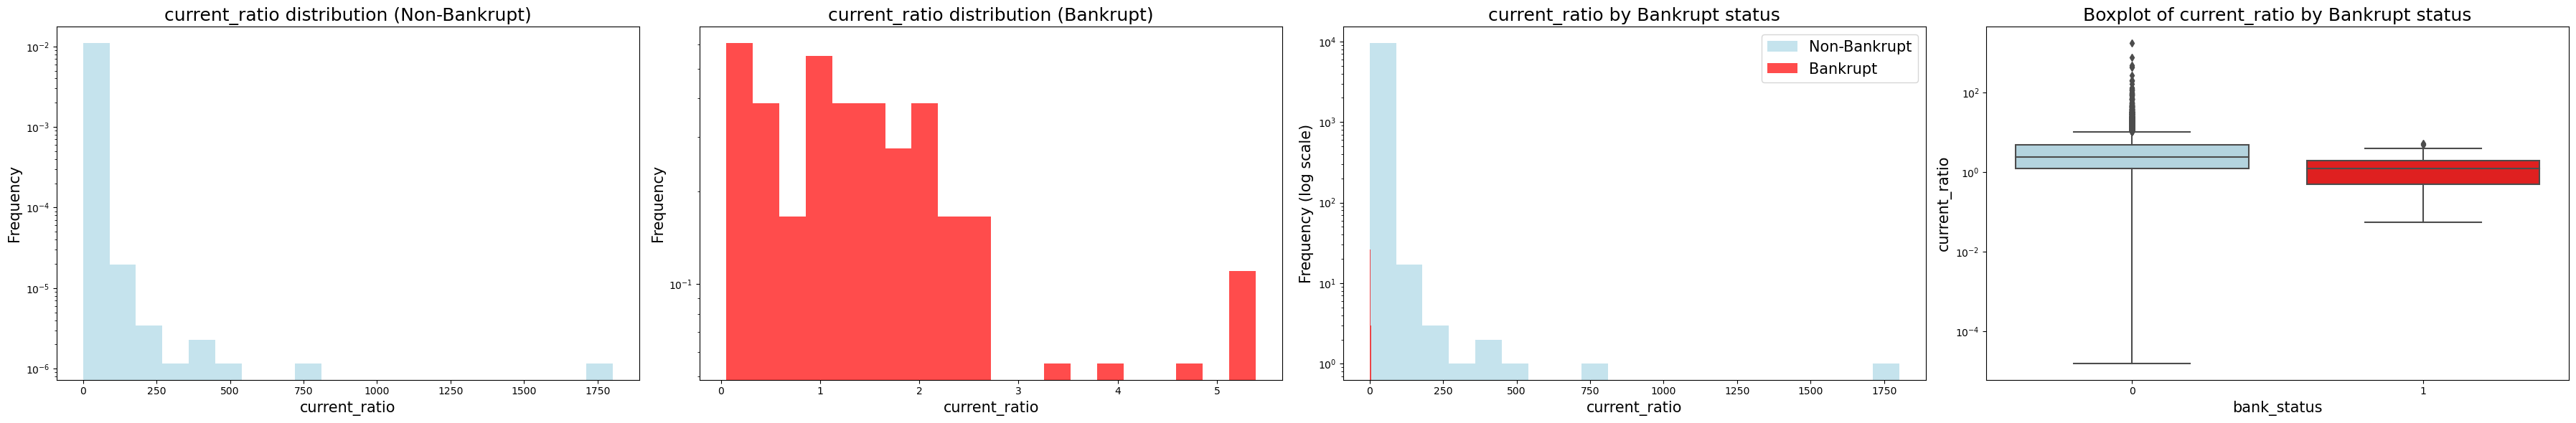

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


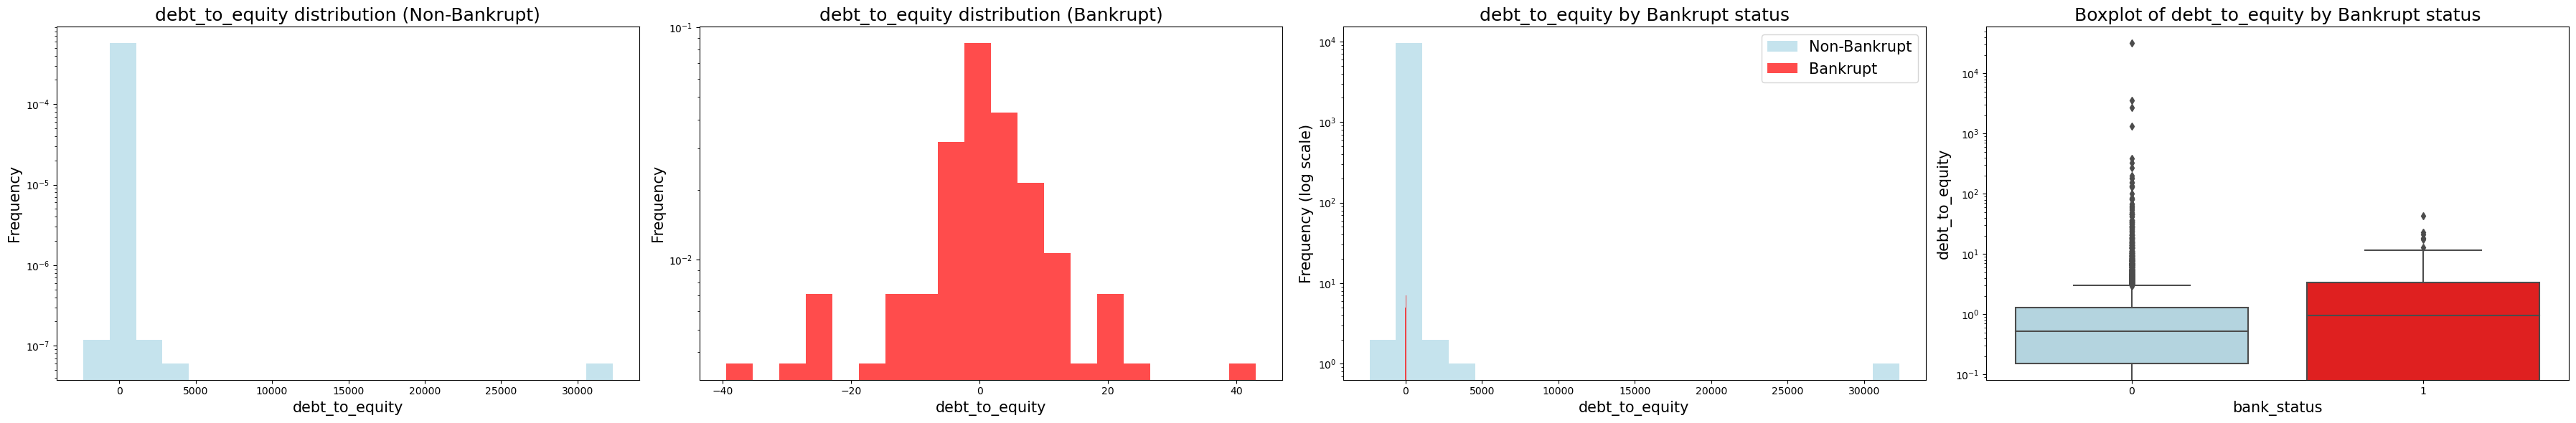

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


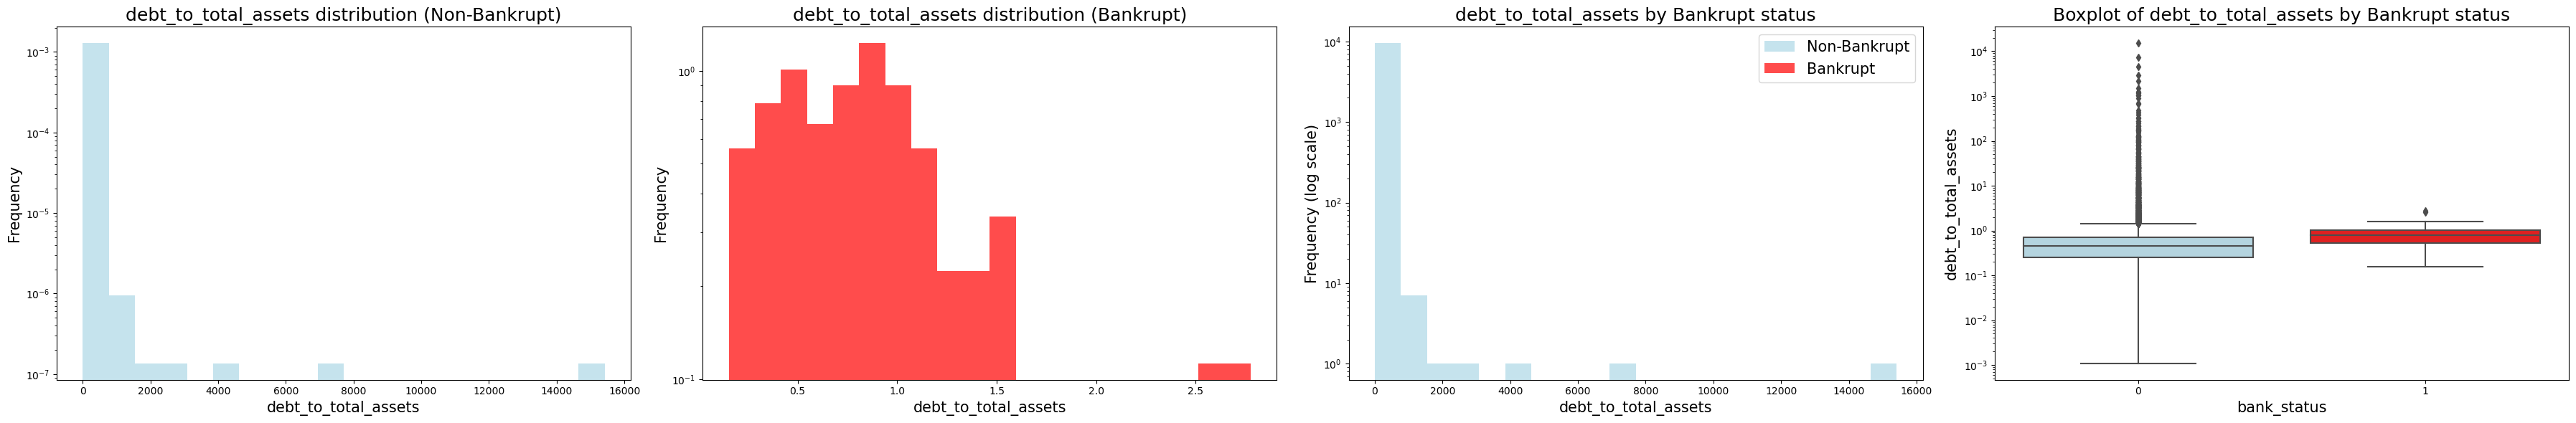

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


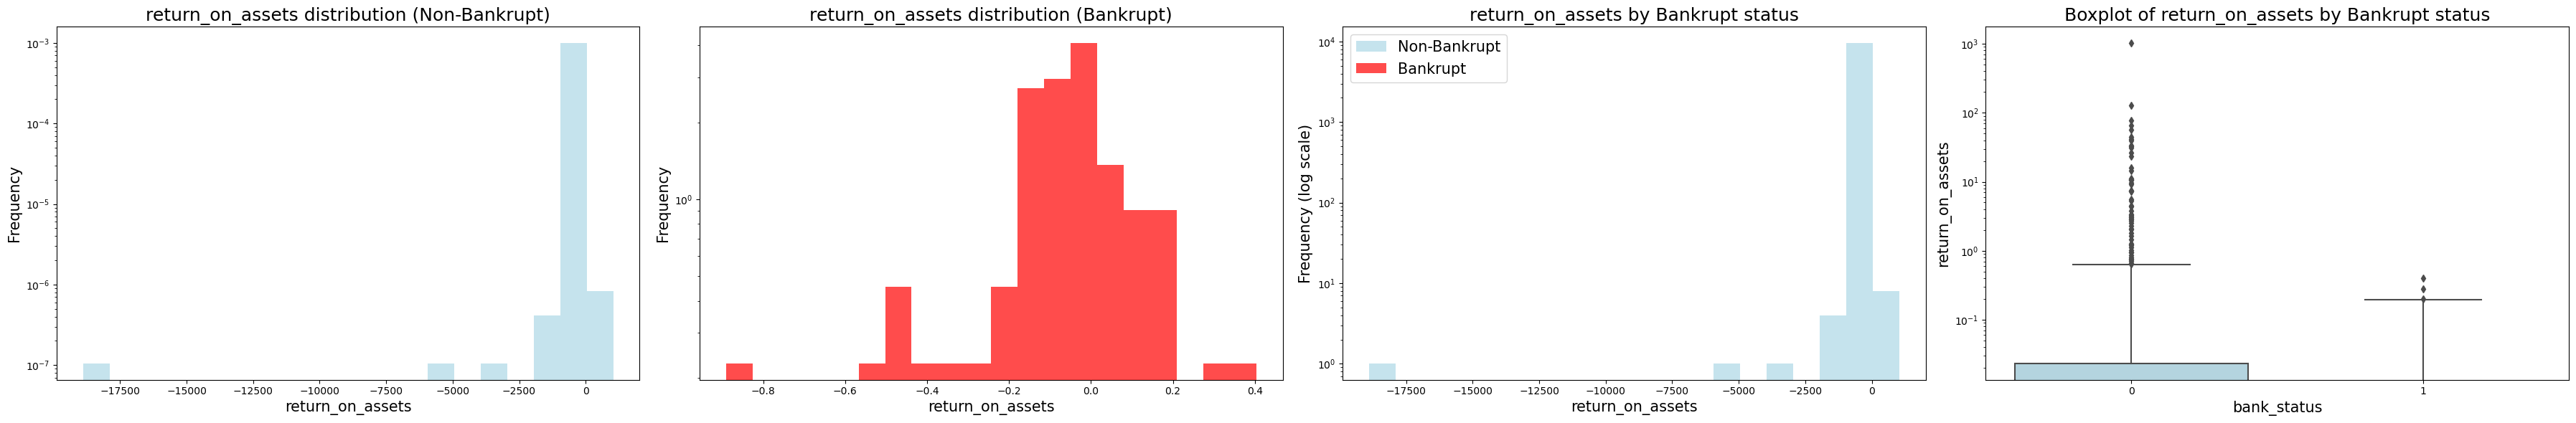

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


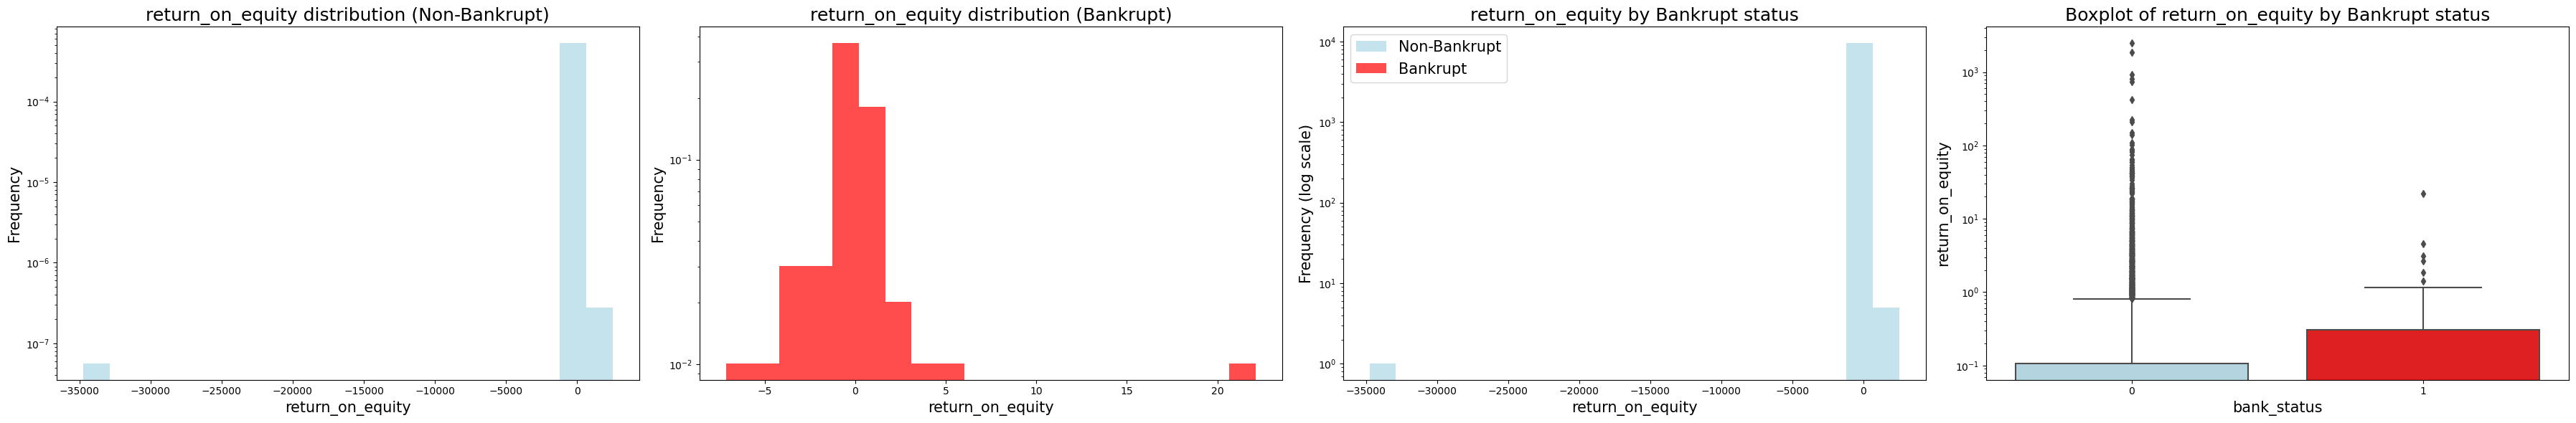

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


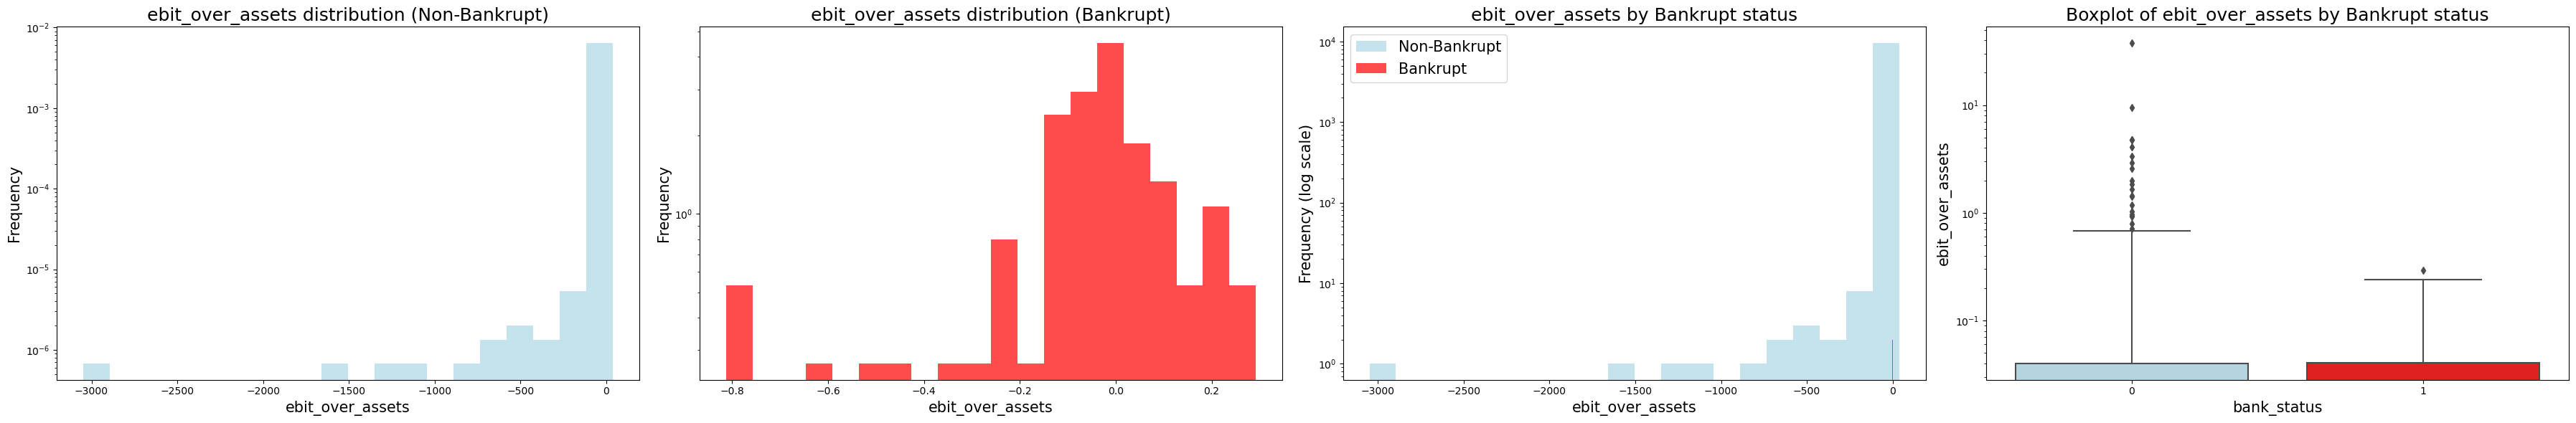

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


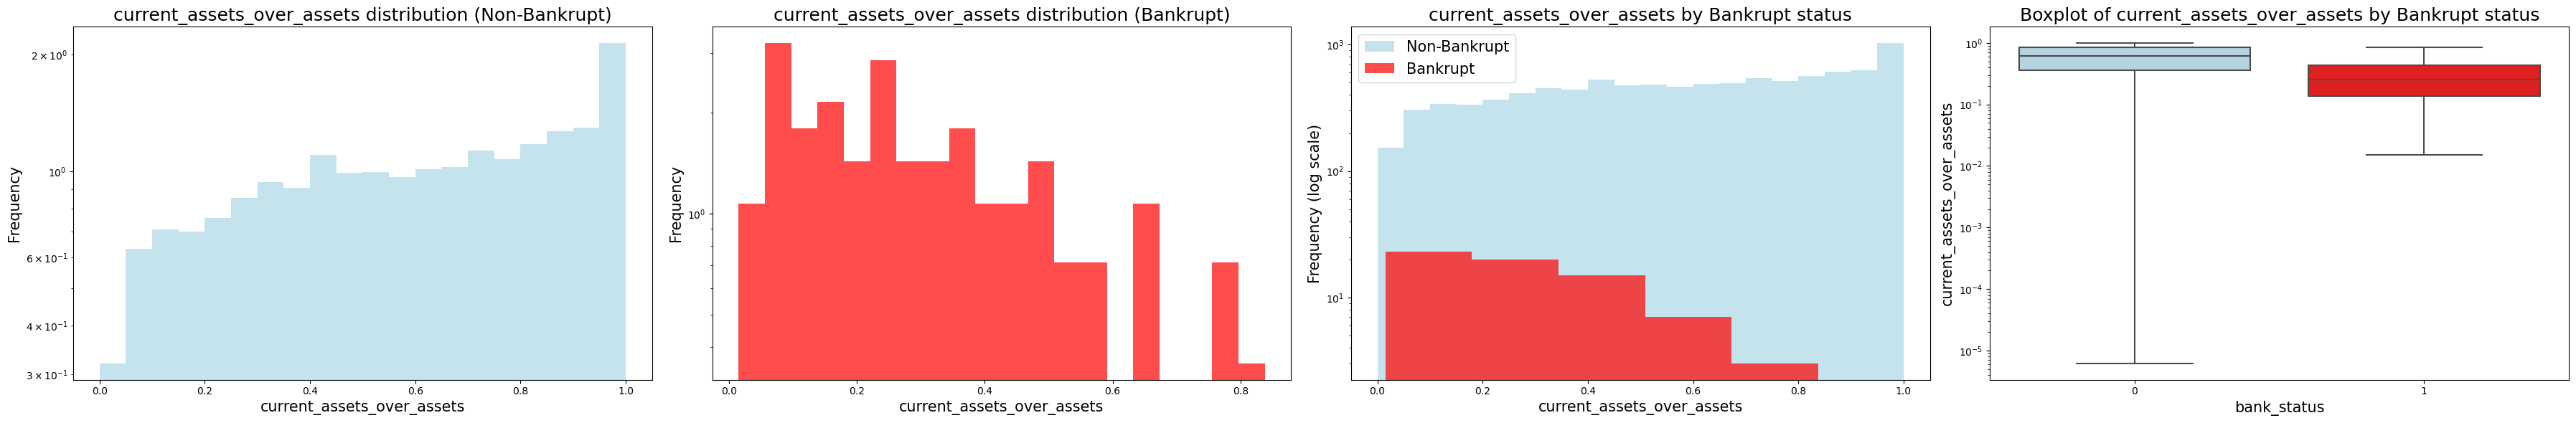

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


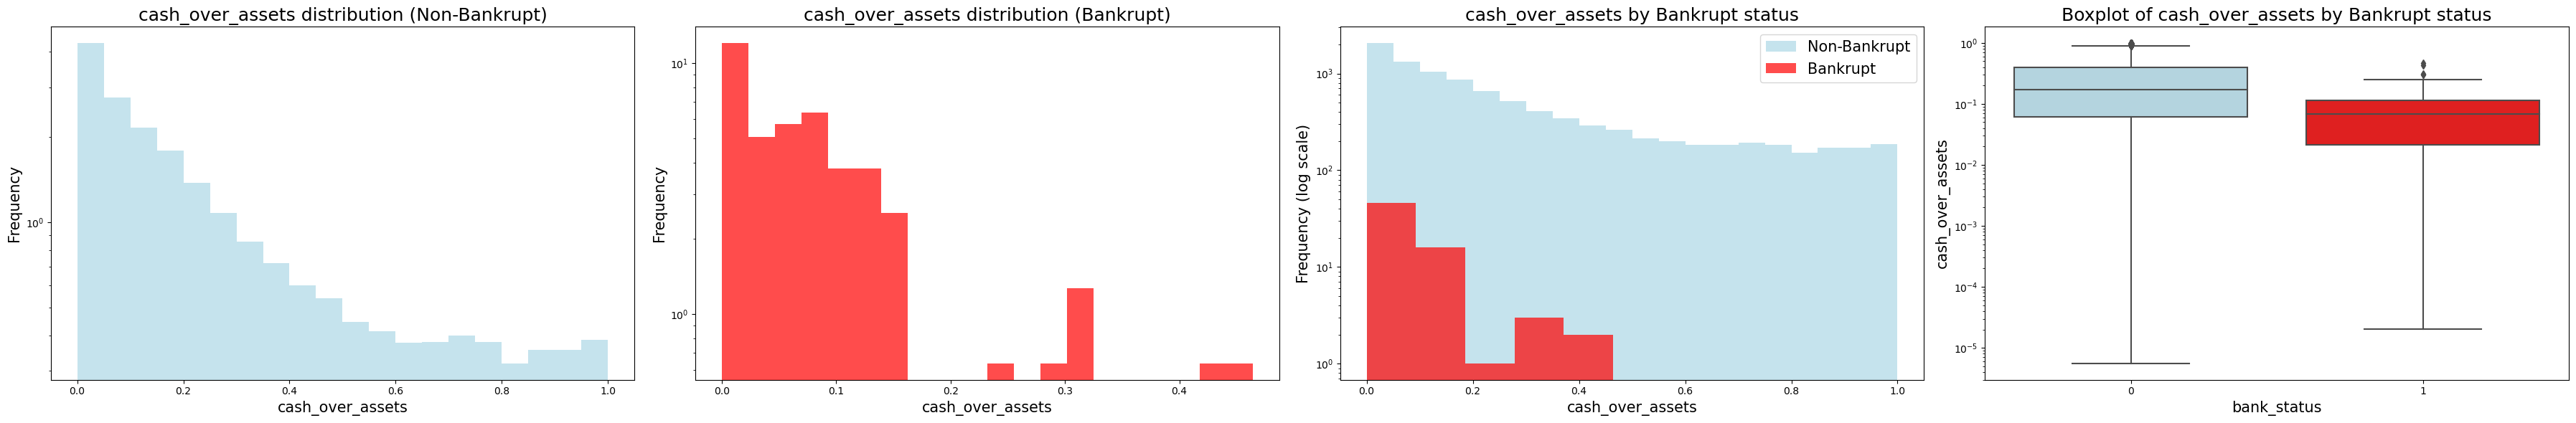

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


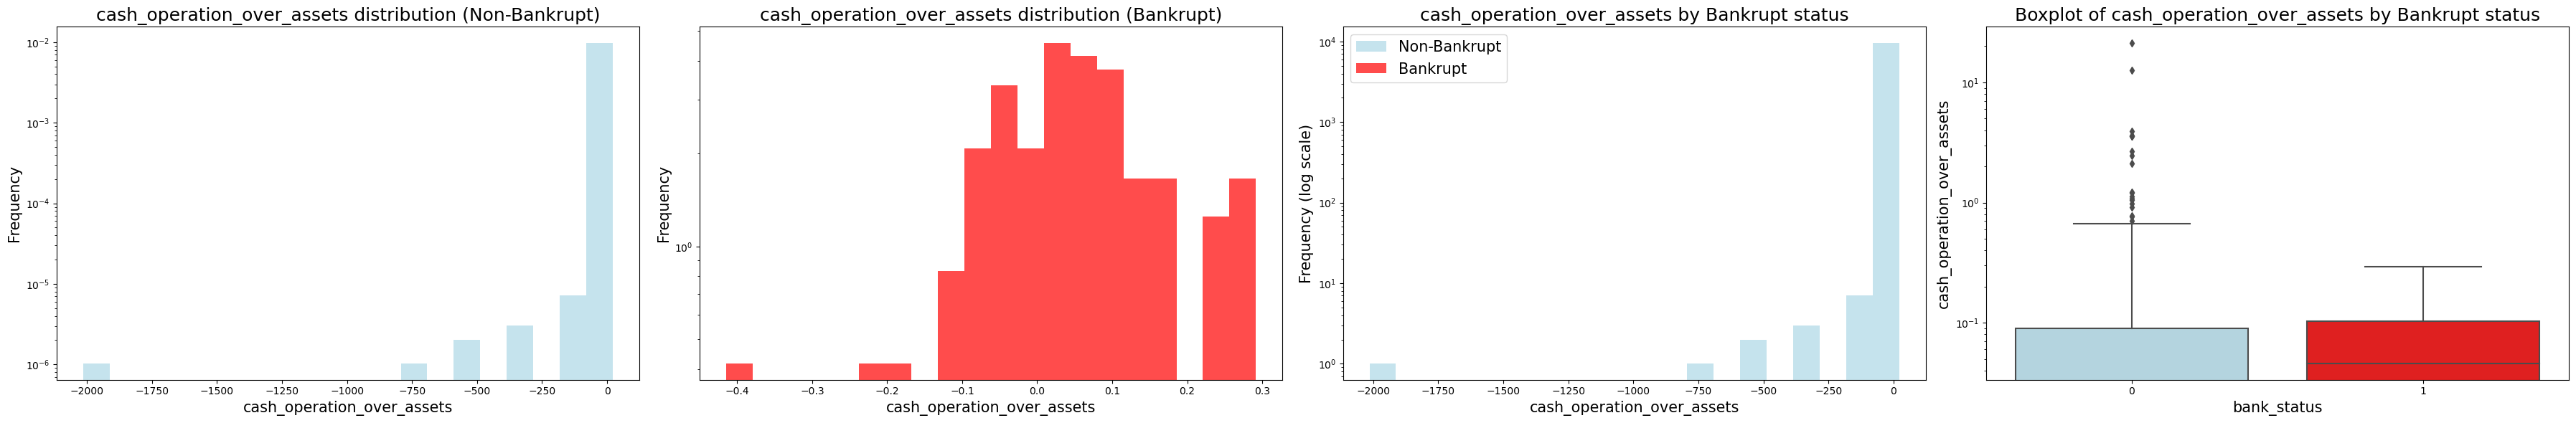

/var/folders/dq/wnfy30v16qgd86jd5yz3tnwc0000gn/T/ipykernel_54810/310816430.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


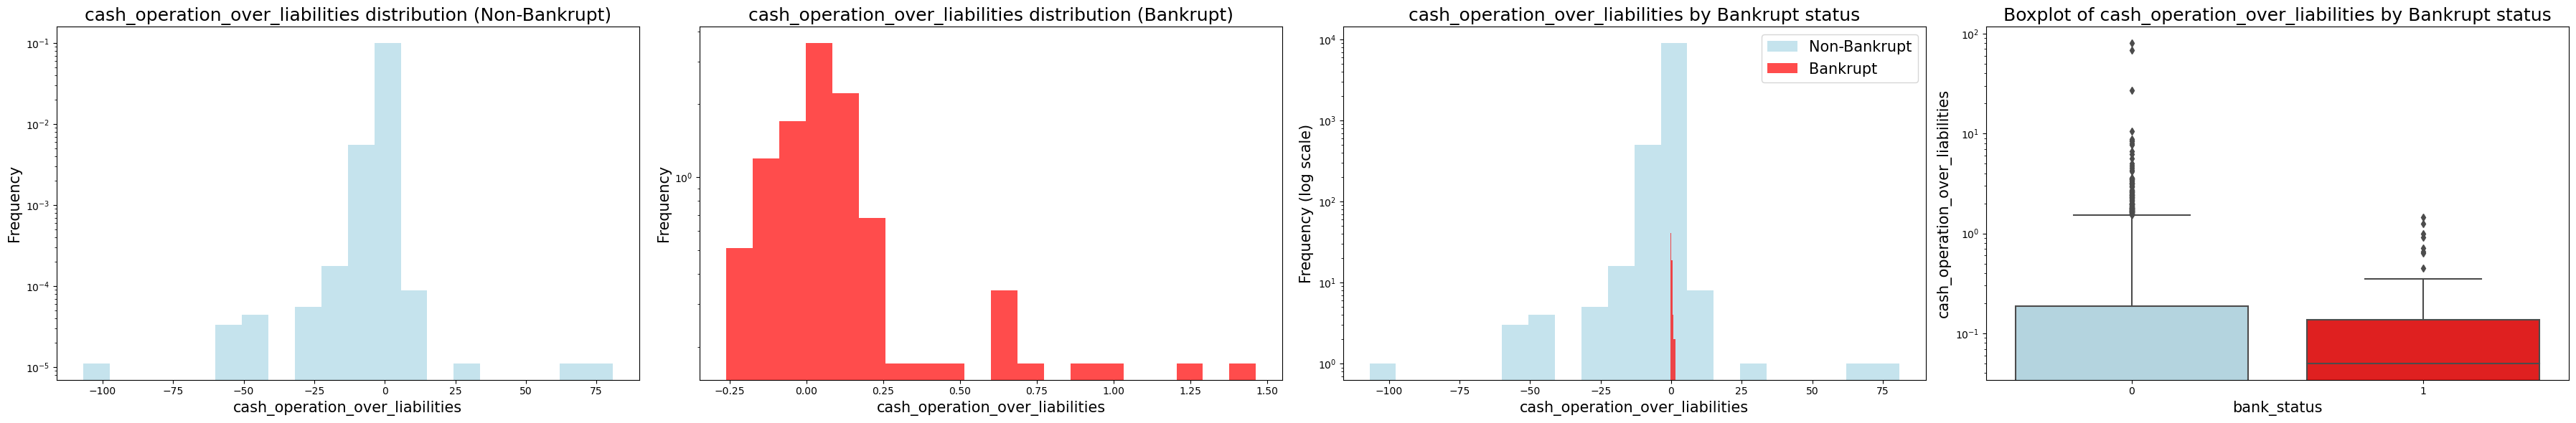

In [6]:
# Select a subset of the numerical columns for visualization
exclude_var = ['cik', 'sic', 'sic_description', 'accession_num', 'primary_doc', 'filelink', 'filedate' , 'year', 'main_industry', 'item_1A', 'item_2', 'item_7']

df_exclude_var = df.drop(columns = exclude_var)

# Separate the dataframe into two based on bank_status
df_bankrupt = df_exclude_var[df_exclude_var['bank_status'] == 1]
df_non_bankrupt = df_exclude_var[df_exclude_var['bank_status'] == 0]
palette = ['lightblue', 'red']

for column in df_bankrupt.columns[1:]: # Exclude the bank_status column
    plt.subplots(figsize = (36, 6))

    plt.subplot(1,4,1)
    plt.hist(df_non_bankrupt[column], bins = 20, color = 'lightblue', alpha = 0.7, label='Non-Bankrupt', density = True)
    plt.yscale('log')
    plt.xlabel(column, fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.title(f'{column} distribution (Non-Bankrupt)', fontsize = 18)

    plt.subplot(1,4,2)
    plt.hist(df_bankrupt[column], bins = 20, color = 'red', alpha = 0.7, label = 'Bankrupt', density = True)
    plt.yscale('log')
    plt.xlabel(column, fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.title(f'{column} distribution (Bankrupt)', fontsize = 18)

    plt.subplot(1,4,3)
    plt.hist(df_non_bankrupt[column], bins = 20, alpha = 0.7, label = 'Non-Bankrupt', color = 'lightblue')
    plt.hist(df_bankrupt[column], bins = 5, alpha = 0.7, label = 'Bankrupt', color = 'red')
    plt.yscale('log')
    plt.xlabel(column, fontsize = 15)
    plt.ylabel('Frequency (log scale)', fontsize = 15)
    plt.title(f'{column} by Bankrupt status', fontsize = 18)
    plt.legend(fontsize = 15)

    plt.subplot(1,4,4)
    sns.boxplot(x='bank_status', y = column, data = df, palette = palette)
    plt.xlabel("bank_status", fontsize = 15)
    plt.ylabel(column, fontsize = 15)
    plt.title(f'Boxplot of {column} by Bankrupt status', fontsize = 18)
    plt.yscale('log')
    plt.tight_layout()

    plt.show()

# Correlation Heatmap

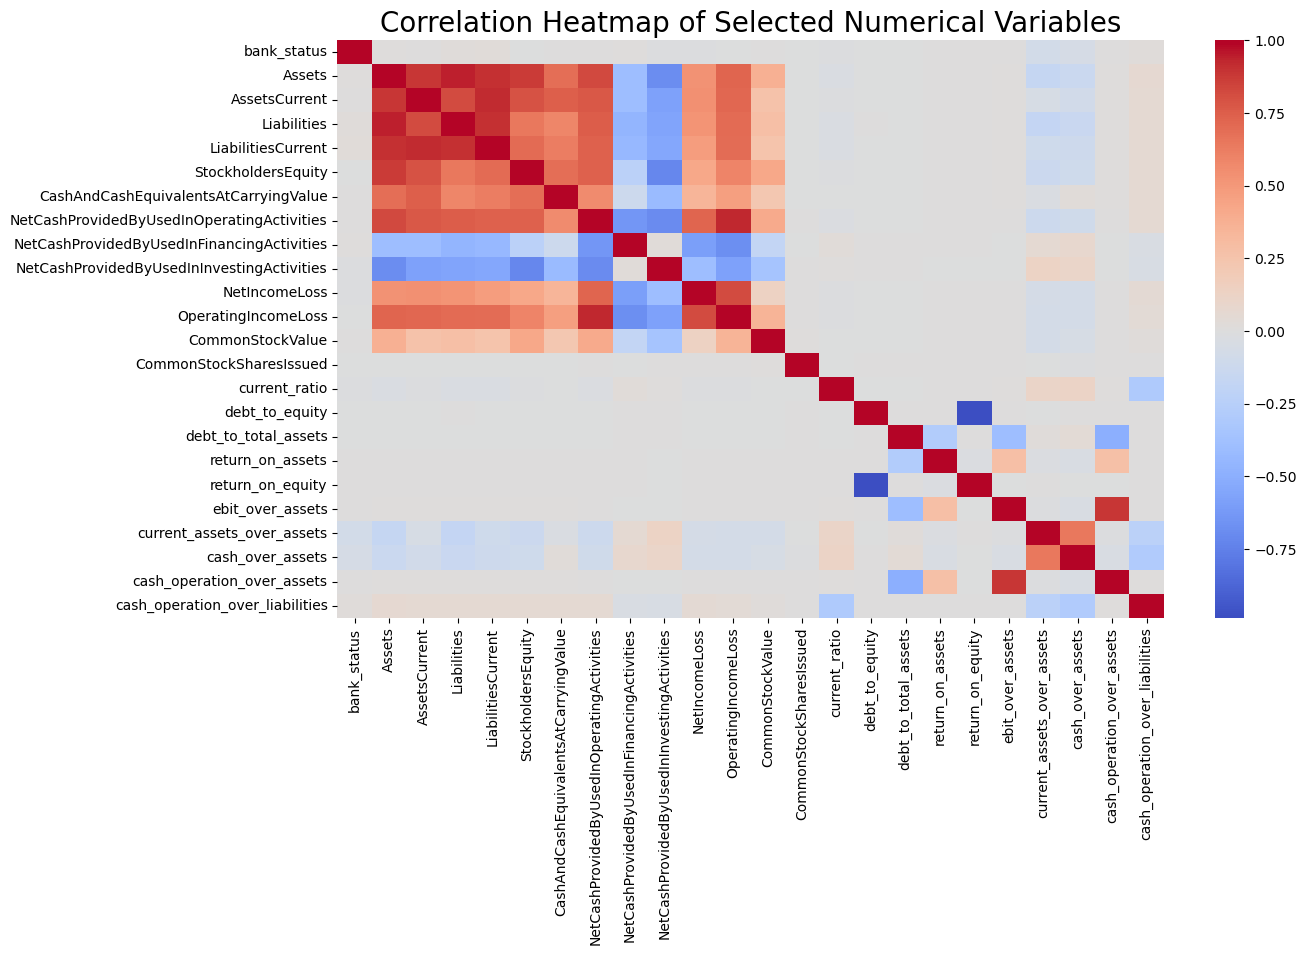

In [60]:
# Calculate the correlation matrix
correlation_matrix = df_exclude_var.corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize = (13.33, 7.5))
sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm', center = 0)
plt.title('Correlation Heatmap of Selected Numerical Variables', fontsize = 20)
plt.show()


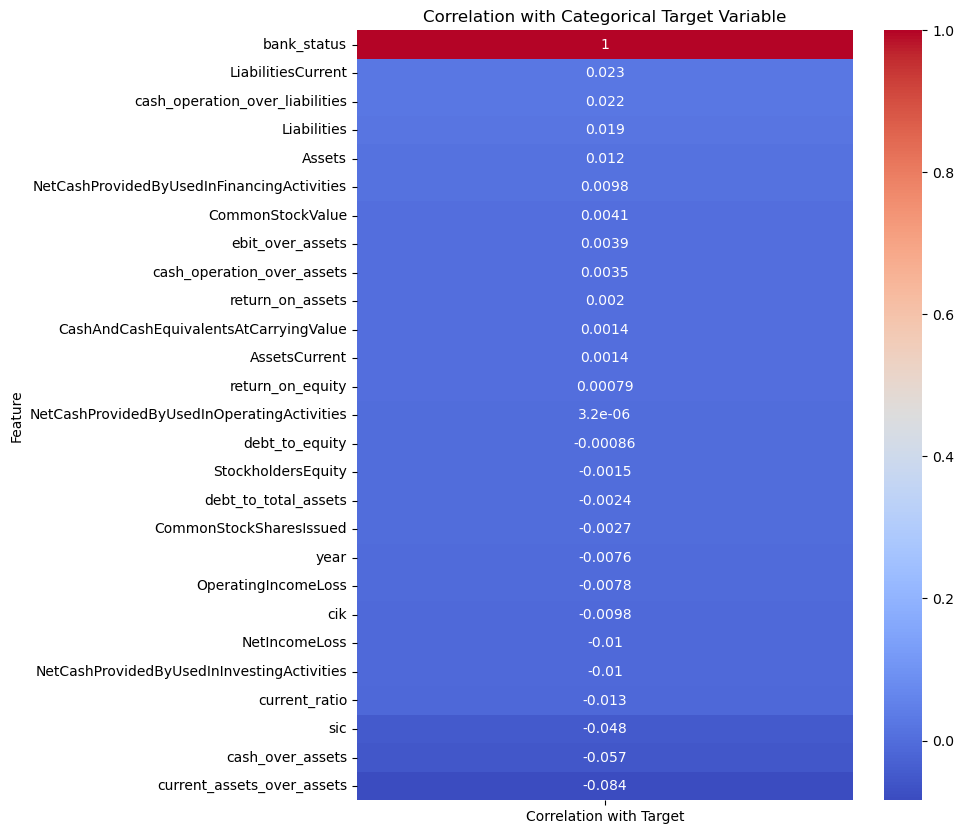

In [7]:
df['bank_status'] = df['bank_status'].astype(int)

# Calculate point-biserial correlation for each feature with the target
correlations = {col: pointbiserialr(df[col], df['bank_status']).correlation for col in df.columns if df[col].dtype != 'O'}

# Create a DataFrame from the correlations dictionary
corr_df = pd.DataFrame(list(correlations.items()), columns = ['Feature', 'Correlation with Target']).set_index('Feature')

# Generate a heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(corr_df.sort_values(by = 'Correlation with Target', ascending = False), annot = True, cmap = 'coolwarm')
plt.title('Correlation with Categorical Target Variable')
plt.show()

## Bankruptcy rate across industries

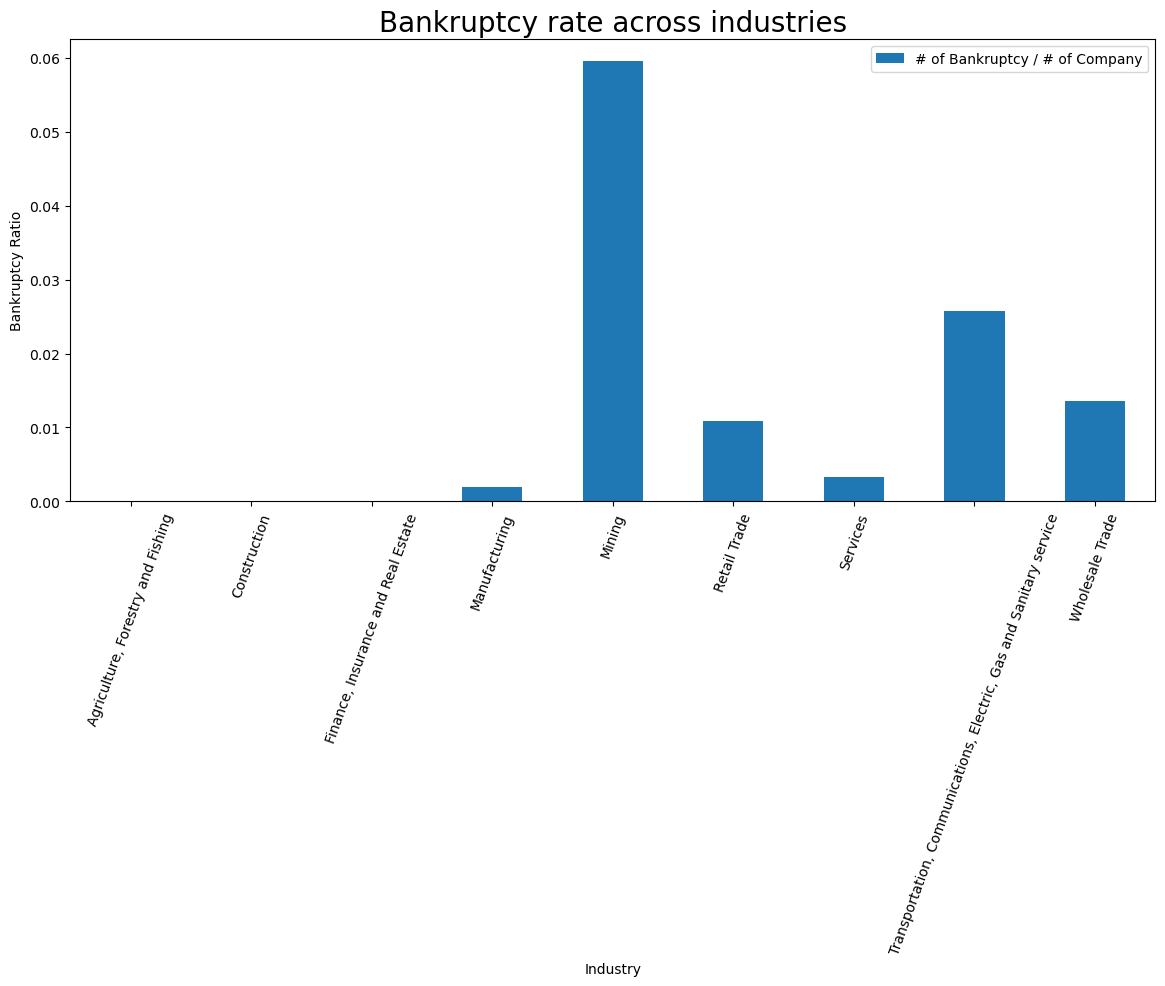

In [9]:
bankruptcy_counts = df.groupby('main_industry')['bank_status'].value_counts().unstack(fill_value=0)

data1 = bankruptcy_counts[0]
data2 = bankruptcy_counts[1]
categories = bankruptcy_counts.index
data3 = data1 + data2
ratio = data2 / data3
ratio.plot(kind = "bar" , figsize = (14, 6) , ylabel = "Bankruptcy Ratio")
plt.legend(["# of Bankruptcy / # of Company"] , loc = "best")
plt.xlabel("Industry")
plt.xticks(rotation = 70)
plt.title("Bankruptcy rate across industries", fontsize = 20)
plt.show()

## Bankruptcy rate across year

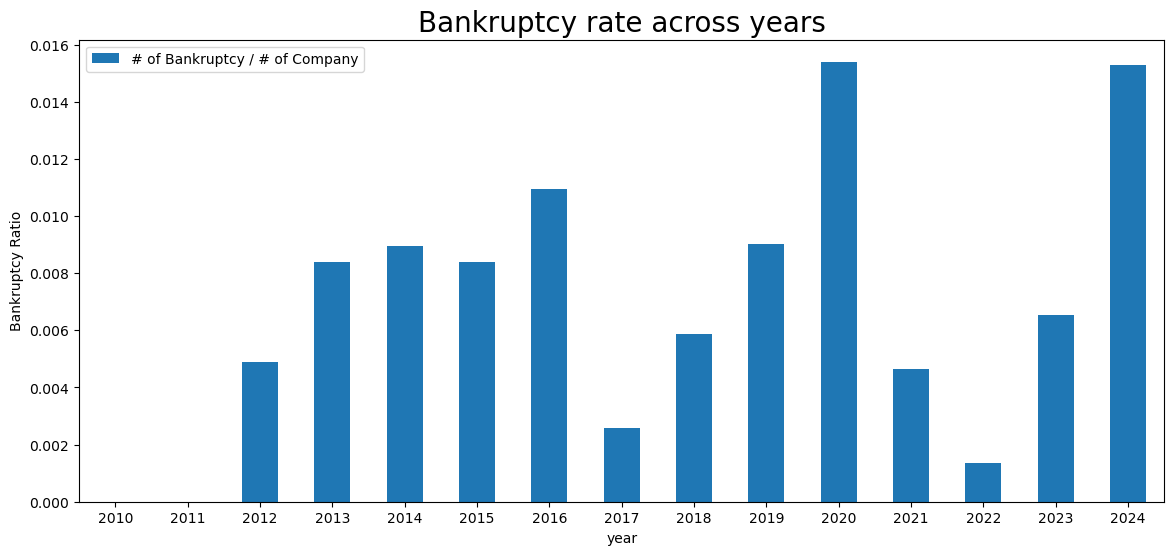

In [13]:
bankruptcy_counts = df.groupby('year')['bank_status'].value_counts().unstack(fill_value = 0)
year_index = bankruptcy_counts.index
data1 = bankruptcy_counts[0]
data2 = bankruptcy_counts[1]
year_ratio = data2 / (data1+ data2)
year_ratio.plot(kind = "bar" , figsize = (14, 6) , ylabel = "Bankruptcy Ratio")
plt.legend(["# of Bankruptcy / # of Company"] , loc = "best")
plt.title("Bankruptcy rate across years", fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

## Company count by bank_status across industries

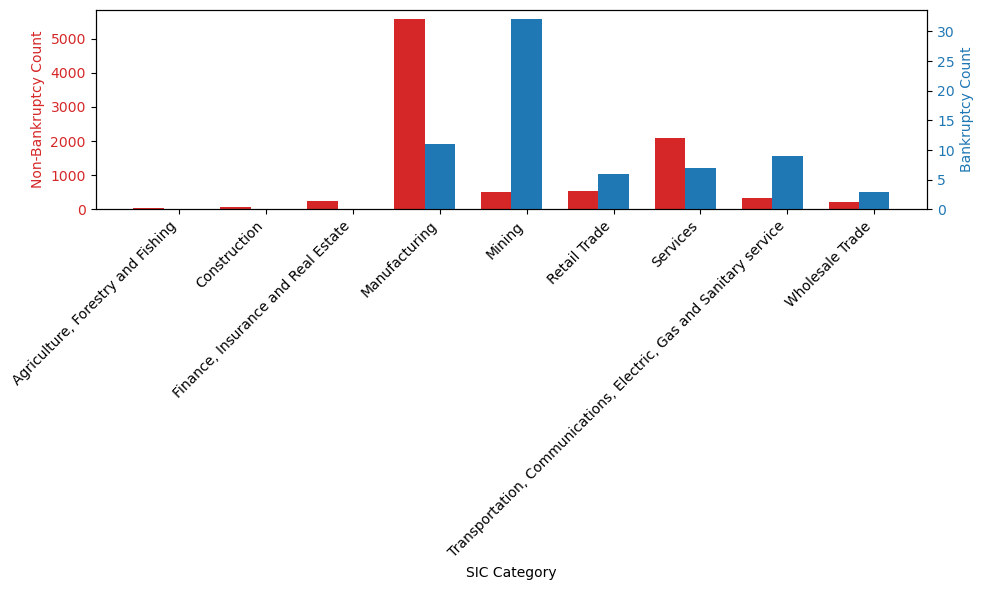

In [11]:
bankruptcy_counts = df.groupby('main_industry')['bank_status'].value_counts().unstack(fill_value = 0)

data1 = bankruptcy_counts[0]
data2 = bankruptcy_counts[1]
categories = bankruptcy_counts.index

# Define the width of the bars
bar_width = 0.35
# Set the position of bar on X axis
r1 = np.arange(len(data1))
r2 = [x + bar_width for x in r1]

fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:red'
ax1.set_xlabel('SIC Category')
ax1.set_ylabel('Non-Bankruptcy Count', color=color)
# Create bars for non-bankruptcy count
ax1.bar(r1, data1, color = color, width = bar_width, label = 'Non-Bankruptcy')
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.set_xticks([r + bar_width for r in range(len(r1))])
ax1.set_xticklabels(categories, rotation = 45, horizontalalignment = 'right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Bankruptcy Count', color = color)
# Create bars for bankruptcy count
ax2.bar(r2, data2, color=color, width = bar_width, label = 'Bankruptcy')
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.show()

## Company count by bank_status across year

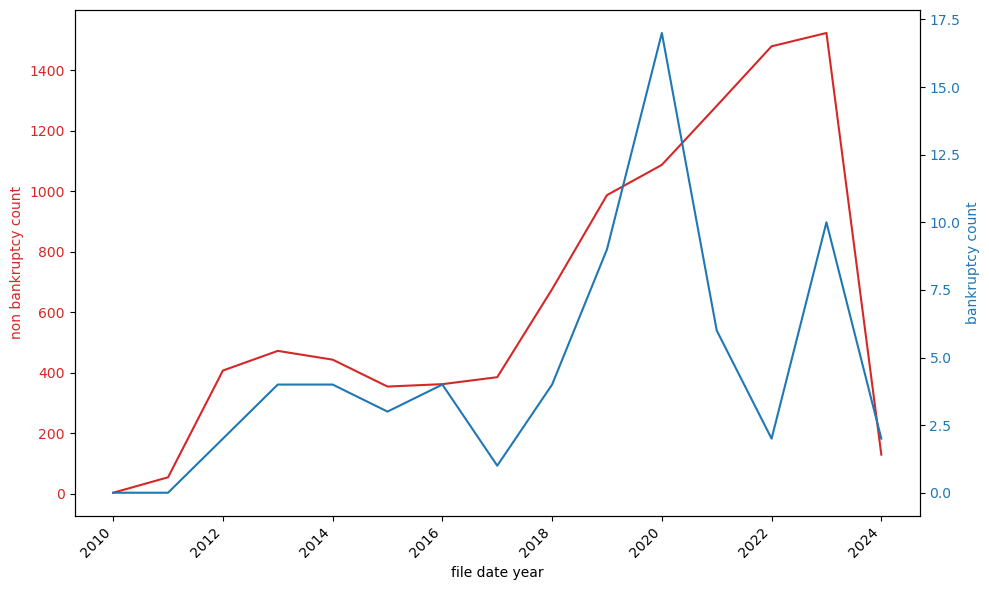

In [12]:
bankruptcy_counts = df.groupby('year')['bank_status'].value_counts().unstack(fill_value = 0)
year_index = bankruptcy_counts.index
data1 = bankruptcy_counts[0]
data2 = bankruptcy_counts[1]

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('file date year')
ax1.set_ylabel('non bankruptcy count', color=color)
ax1.plot(year_index, data1, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
plt.xticks(rotation = 45,horizontalalignment = 'right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('bankruptcy count', color=color)
ax2.plot(year_index, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()